In [1]:
# ----------------------------------------------------------------------
# Created: 2020-09-02
# Last-Updated: 
# Filename: probability_distribution.ipynb
# Author: Yinan Yu
# Description:  
# If you have any questions or comments, email yinan@chalmers.se or 
# yinan.yu@asymptotic.ai
# Note: the content of this file is subject to change
# ----------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
plt.style.use('seaborn-darkgrid')

# Probability distribution

6.647410115000001 2.091202770780186


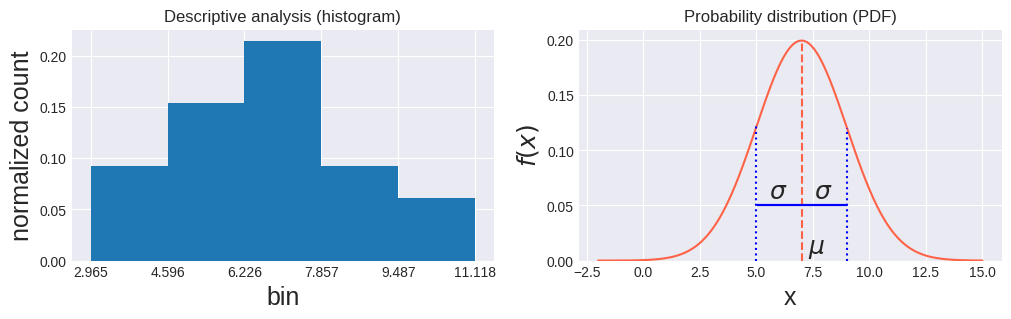

In [2]:
# Gaussian distribution
# The weights from 20 ducks
x20 = np.asarray([6.97710573, 5.43375569, 2.96530419, 7.0688393,  
                  8.54138578, 7.21095378, 7.5280192, 3.48436681, 
                  3.72277599, 9.00523767, 11.11799661, 7.43367982,
                  7.89700412, 5.48777901, 4.67864893, 6.53947651, 
                  5.99161583, 9.97135229, 4.62585846, 7.26704658])
fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi=100) 
print(x20.mean(), x20.std())
mu = 7
std = 2
N = 1000
x = np.linspace(-2, 15, num=N)
pdf = stats.norm.pdf(x, mu, std)
axes[1].plot(x, pdf, c="tomato")
axes[1].set_title("Probability distribution (PDF)")
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("$f(x)$", fontsize=18)
_x = x[x>=mu][0]
_p = pdf[x>=mu][0]
axes[1].vlines(_x, ymin=0, ymax=_p, color="tomato", linestyle="dashed")
axes[1].set_ylim(0)
axes[1].annotate("$\mu$", (_x, 0), 
                 xytext=(5, 5), 
                 textcoords="offset points", fontsize=18)

__x0 = x[x>=mu-std][0]
__p0 = pdf[x>=mu-std][0]
__x1 = x[x>=mu+std][0]
__p1 = pdf[x>=mu+std][0]

axes[1].hlines(0.05, xmin=__x0, xmax=__x1, color="blue")
axes[1].hlines(0.05, xmin=__x0, xmax=__x1, color="blue")
axes[1].vlines(mu-std, ymin=0, ymax=__p0, color="blue", linestyle="dotted")
axes[1].vlines(mu+std, ymin=0, ymax=__p1, color="blue", linestyle="dotted")

axes[1].annotate("$\sigma$", (mu-1.75, 0.05), 
                 xytext=(5, 5), 
                 textcoords="offset points", fontsize=18)
axes[1].annotate("$\sigma$", (mu+0.25, 0.05), 
                 xytext=(5, 5), 
                 textcoords="offset points", fontsize=18)

# d = np.random.normal(loc=5, scale=2, size=5000)
_, bins, _ = axes[0].hist(x20, density=True, bins=5) 
axes[0].set_title("Descriptive analysis (histogram)") 
axes[0].set_xlabel("bin", fontsize=18)
axes[0].set_xticks(bins)
axes[0].set_ylabel("normalized count", fontsize=18);

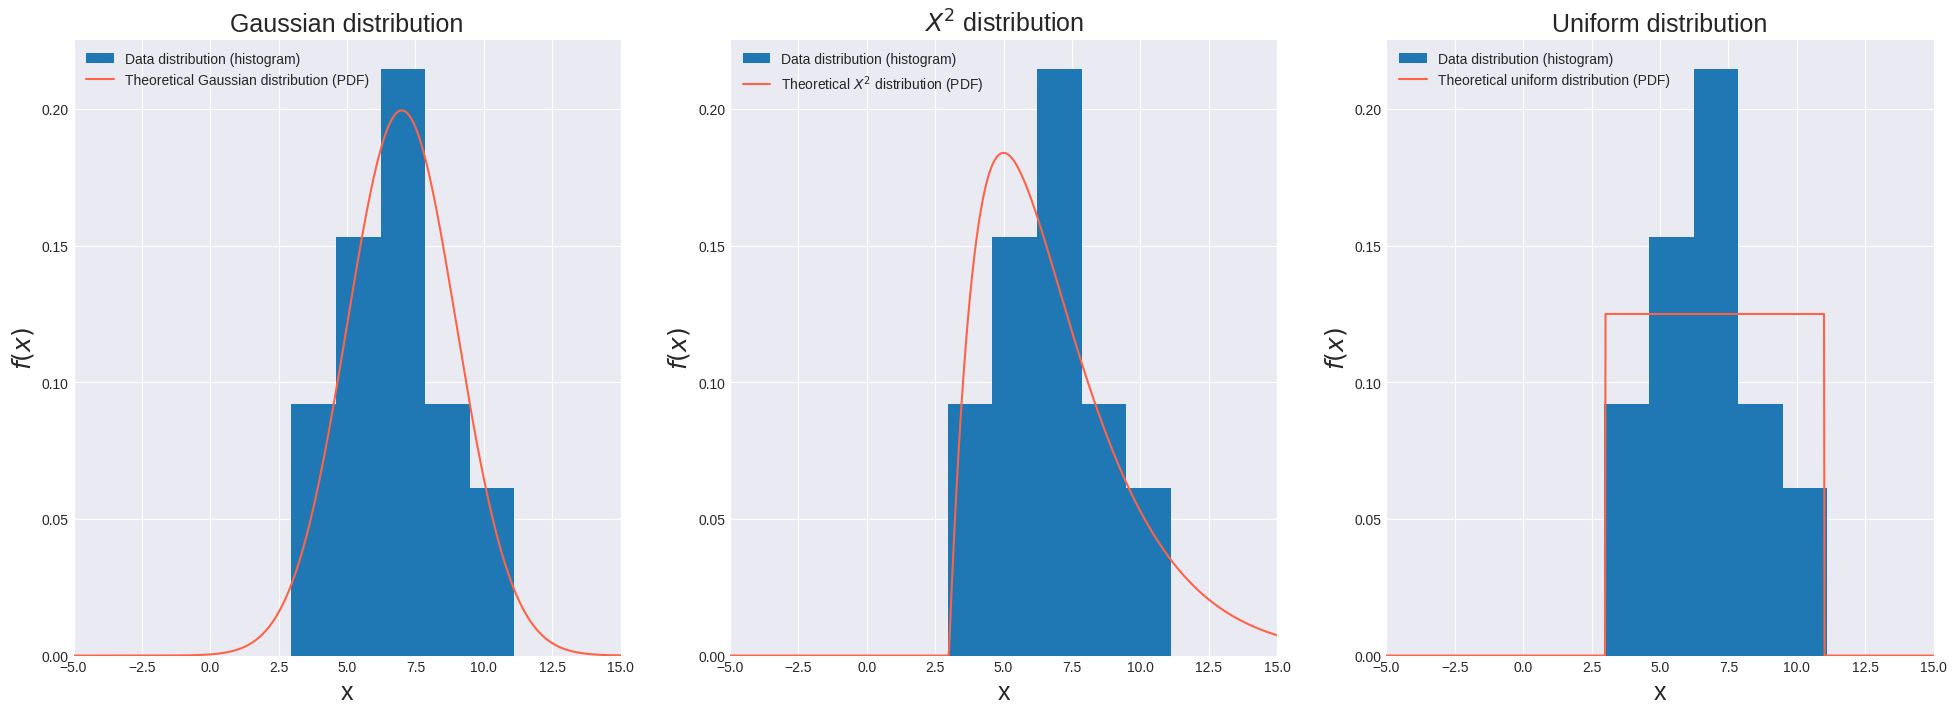

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8), dpi=100) 
mu = 7
std = 2 
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
pdf_gaussian = stats.norm.pdf(x, mu, std)
axes[0].hist(x20, density=True, bins=5, label="Data distribution (histogram)") 
axes[0].plot(x, pdf_gaussian, c="tomato", label="Theoretical Gaussian distribution (PDF)")
axes[0].set_title("Gaussian distribution", fontsize=18)
axes[0].set_xlabel("x", fontsize=18);
axes[0].set_ylabel("$f(x)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].legend(loc="upper left")

pdf_chi2 = stats.chi2.pdf(x, df=4, loc=3, scale=1)
axes[1].hist(x20, density=True, bins=5, label="Data distribution (histogram)") 
axes[1].plot(x, pdf_chi2, c="tomato", label="Theoretical $X^2$ distribution (PDF)")
axes[1].set_title(r"$X^2$ distribution", fontsize=18)
axes[1].set_xlabel("x", fontsize=18);
axes[1].set_ylabel("$f(x)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
axes[1].legend(loc="upper left")

pdf_uniform = stats.uniform.pdf(x, loc=3, scale=8)
axes[2].hist(x20, density=True, bins=5, label="Data distribution (histogram)") 
axes[2].plot(x, pdf_uniform, c="tomato", label="Theoretical uniform distribution (PDF)")
axes[2].set_title("Uniform distribution", fontsize=18)
axes[2].set_xlabel("x", fontsize=18);
axes[2].set_ylabel("$f(x)$", fontsize=18);
axes[2].set_ylim(0)
axes[2].set_xlim(xmin, xmax)
axes[2].legend(loc="upper left");

# Location and scale

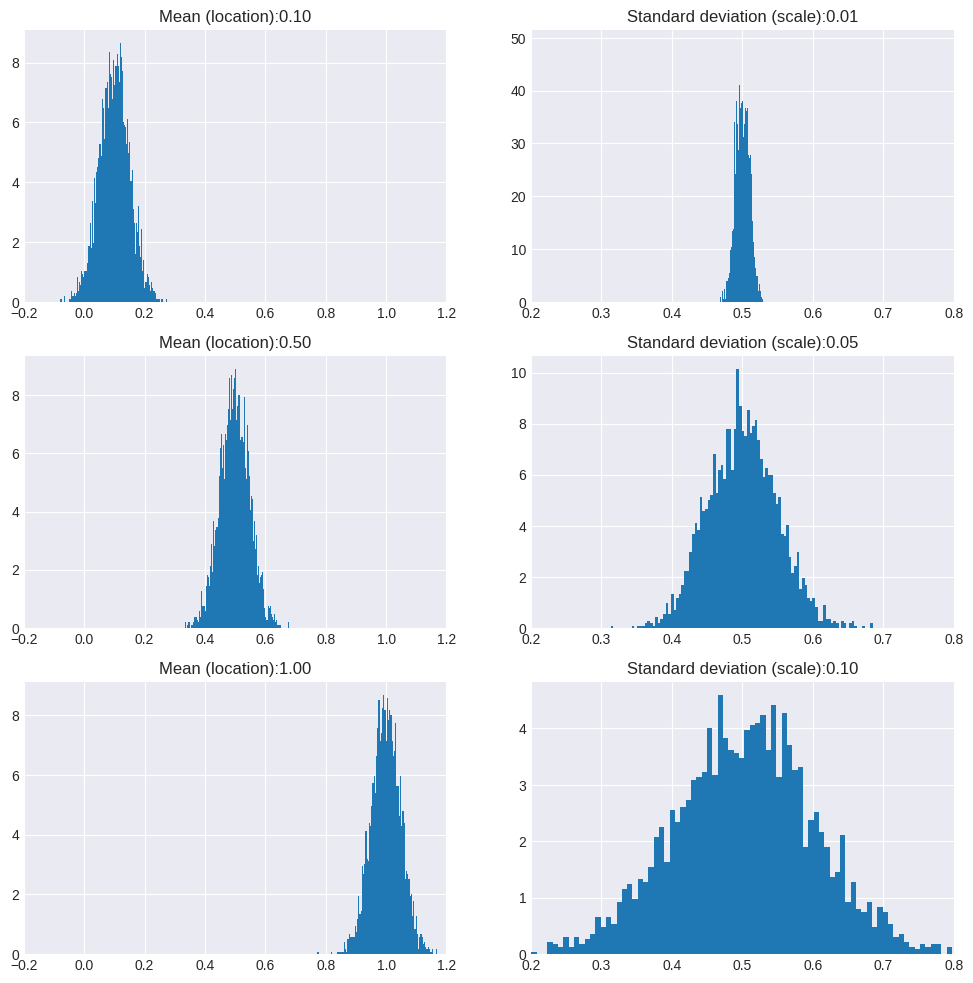

In [4]:
means = [0.1, 0.5, 1.0]
stds = [0.01, 0.05, 0.1]

std = 0.05
fig, axes = plt.subplots(3, 2, figsize=(12,12), dpi= 100) 
for i, mean in enumerate(means):
    x = np.random.normal(loc=mean, scale=std, size=3000)
    axes[i,0].hist(x, density=True, bins=100) 
    axes[i,0].set_xlim(-0.2, 1.2)
    axes[i,0].set_title("Mean (location):%.2f"%mean)
    
mean = 0.5
for i, std in enumerate(stds):
    x = np.random.normal(loc=mean, scale=std, size=3000)
    axes[i,1].hist(x, density=True, bins=100) 
    axes[i,1].set_xlim(0.2, 0.8)
    axes[i,1].set_title("Standard deviation (scale):%.2f"%std)    

## PMF vs PDF

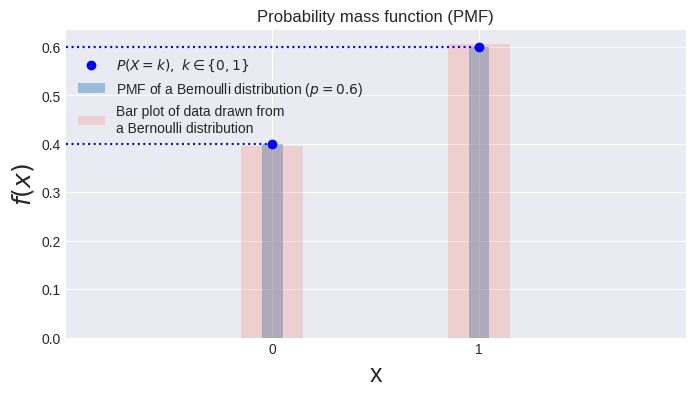

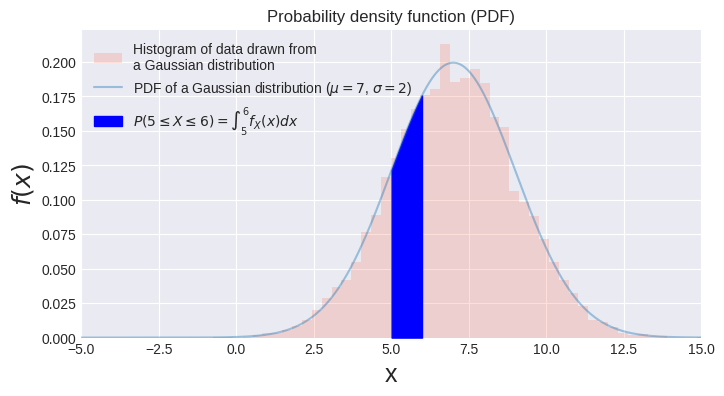

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100) 

N = 10000
p = 0.6
rv_bernoulli = stats.bernoulli.rvs(size=N,p=p)
p1 = rv_bernoulli[rv_bernoulli==1].size/rv_bernoulli.size
p0 = rv_bernoulli[rv_bernoulli==0].size/rv_bernoulli.size

ax.bar([0,1],[1-p,
              p],
           width=0.1, alpha=0.4, label="PMF of a Bernoulli distribution ($p=0.6$)")
ax.bar([0, 1], [p0, p1], width=0.3, alpha=0.2, color="tomato", 
       label="Bar plot of data drawn from\na Bernoulli distribution")

ax.scatter([0, 1], [1-p, p], color="blue", label=r"$P(X=k),~k\in\{0, 1\}$")
ax.hlines(1-p, xmin=-1, xmax=0, color="blue", linestyle="dotted")
ax.hlines(p, xmin=-1, xmax=1, color="blue", linestyle="dotted")
ax.set_xlim(-1, 2)
ax.set_xticks([0,1]);
ax.set_title("Probability mass function (PMF)")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("x", fontsize=18)
ax.legend(loc=(0.01,0.64))

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100) 
xmin = -5
xmax = 15
mu = 7
std = 2
x = np.linspace(xmin, xmax, num=1000)
rv_gaussian = stats.norm.rvs(size=N, loc=mu, scale=std)
pdf_gaussian = stats.norm.pdf(x=x, loc=mu, scale=std)

ax.hist(rv_gaussian,alpha=0.2, color="tomato", density=True,
             label="Histogram of data drawn from\na Gaussian distribution", bins=50)
ax.plot(x, pdf_gaussian, alpha=0.4, 
            label="PDF of a Gaussian distribution ($\mu=%i$, $\sigma=%i$)"%(mu, std))
a = 5
b = 6
a_idx = x>=a
b_idx = x<=b
x_ab = x[a_idx & b_idx]
pdf_ab = pdf_gaussian[a_idx & b_idx]
ax.fill_between(x_ab, pdf_ab, color="blue", label=r"$P(5\leq X\leq 6)=\int_5^6 f_X(x)dx$")
ax.set_xlim(xmin, xmax)
ax.set_title("Probability density function (PDF)")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("x", fontsize=18)
ax.legend(loc="upper left");

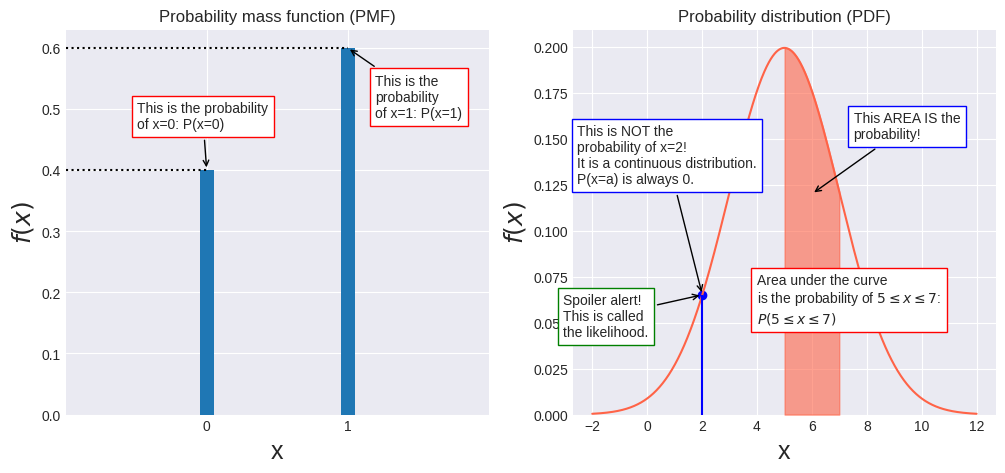

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=100) 

N = 10000
# rv_bernoulli = stats.bernoulli.rvs(size=N,p=0.6)
axes[0].bar([0,1],[0.4,
                   0.6],
           width=0.1); 
axes[0].set_xlim(-1,2)
axes[0].set_xticks([0,1]);
axes[0].set_title("Probability mass function (PMF)")
axes[0].set_ylabel("$f(x)$", fontsize=18)
axes[0].set_xlabel("x", fontsize=18)
axes[0].annotate("This is the probability\nof x=0: P(x=0)", (0, 0.4), 
                 xytext=(-50, 30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="red", facecolor="white"))
axes[0].hlines(0.4, xmin=-1, xmax=0, color="k", linestyle="dotted")
axes[0].annotate("This is the\nprobability\nof x=1: P(x=1)", (1, 0.6), 
                 xytext=(20, -50), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="red", facecolor="white"))
axes[0].hlines(0.6, xmin=-1, xmax=1, color="k", linestyle="dotted")
x = np.linspace(-2, 12, num=1000)
pdf = stats.norm.pdf(x, 5, 2)
axes[1].plot(x, pdf, c="tomato")
axes[1].set_title("Probability distribution (PDF)")
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("$f(x)$", fontsize=18)
axes[1].set_ylim(0) 
xevent = x[(x>=5) & (x<=7)]
pdfevent = pdf[(x>=5) & (x<=7)]
axes[1].fill_between(xevent, pdfevent, 0, color="tomato", alpha=0.6)
axes[1].text(4, 0.05, 
             "Area under the curve\nis the probability of $5\leq x\leq 7$:\n$P(5\leq x\leq 7)$", 
        bbox=dict(edgecolor="red", facecolor="white"))
axes[1].annotate("This AREA IS the\nprobability!", (6, 0.12), 
                 xytext=(30, 40), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));
_x = x[x>=2][0]
_p = pdf[x>=2][0]
axes[1].scatter(_x, _p, color="b")
axes[1].vlines(_x, ymin=0, ymax=_p, color="b")
axes[1].annotate("This is NOT the\nprobability of x=2!\nIt is a continuous distribution.\nP(x=a) is always 0.", (_x, _p), 
                 xytext=(-90, 80), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));
axes[1].annotate("Spoiler alert!\nThis is called\nthe likelihood.", (_x, _p), 
                 xytext=(-100, -30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="g", facecolor="white"));

## CDF

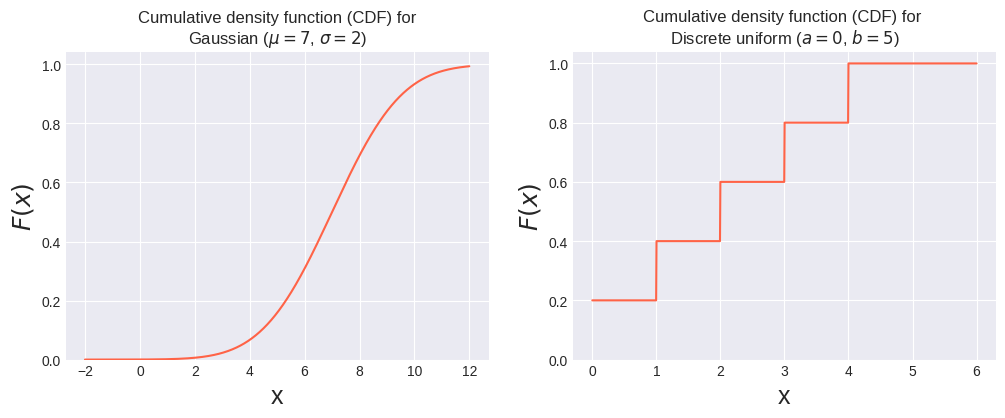

In [7]:
# Gaussian distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100) 
mu = 7
std = 2
x = np.linspace(-2, 12, num=1000)
cdf = stats.norm.cdf(x, mu, std)
axes[0].plot(x, cdf, c="tomato")
axes[0].set_title("Cumulative density function (CDF) for\nGaussian ($\mu=%i$, $\sigma=%i$)"%(mu, std))
axes[0].set_xlabel("x", fontsize=18);
axes[0].set_ylabel("$F(x)$", fontsize=18);
axes[0].set_ylim(0);

x = np.linspace(0, 6, num=1000)
cdf = stats.randint.cdf(x, 0, 5)
axes[1].plot(x, cdf, c="tomato")
axes[1].set_title("Cumulative density function (CDF) for \nDiscrete uniform ($a=0$, $b=5$)")
axes[1].set_xlabel("x", fontsize=18);
axes[1].set_ylabel("$F(x)$", fontsize=18);
axes[1].set_ylim(0);

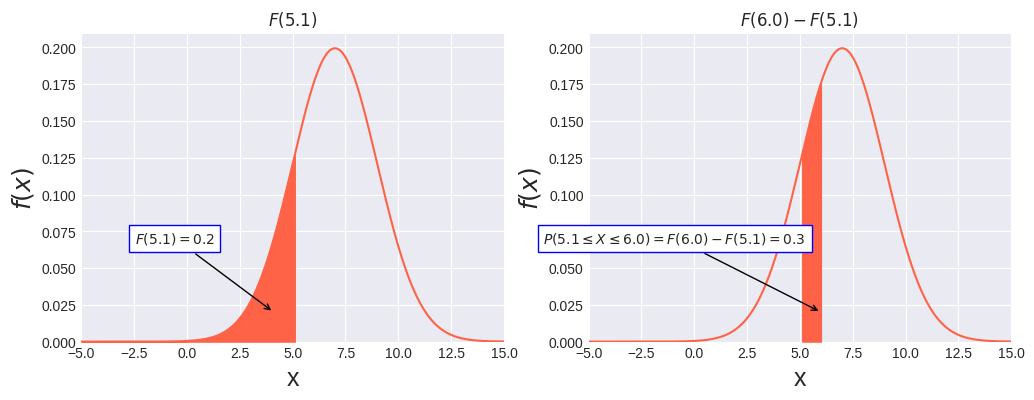

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100) 
mu = 7
std = 2
xmin = -5
xmax = 15
q0 = 5.1
q1 = 6

x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, mu, std)

axes[0].plot(x, pdf, c="tomato")
axes[0].set_xlabel("x", fontsize=18);
axes[0].set_ylabel("$f(x)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].set_title("$F(%.1f)$"%q0)
x0 = np.linspace(xmin, q0, num=100)
p0 = stats.norm.pdf(x0, mu, std)
axes[0].fill_between(x0, p0, 0, color="tomato")

cdf0 = stats.norm.cdf(q0, mu, std)
axes[0].annotate("$F(%.1f)=%.1f$"%(q0, cdf0), 
                 (q0-1, 0.02), 
                 xytext=(-100, 50), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"))


x1 = x[(x<=q1) & (x>=q0)]
p1 = pdf[(x<=q1) & (x>=q0)]
axes[1].fill_between(x1, p1, 0, color="tomato")
axes[1].plot(x, pdf, c="tomato")
axes[1].set_xlabel("x", fontsize=18);
axes[1].set_ylabel("$f(x)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
axes[1].set_title("$F(%.1f)-F(%.1f)$"%(q1, q0))
cdf1 = stats.norm.cdf(q1, mu, std)
axes[1].annotate(r"$P(%.1f\leq X \leq%.1f)=F(%.1f) - F(%.1f)=%.1f$"%(q0, q1, q1, q0, cdf1), 
                 (q1, 0.02), 
                 xytext=(-200, 50), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));


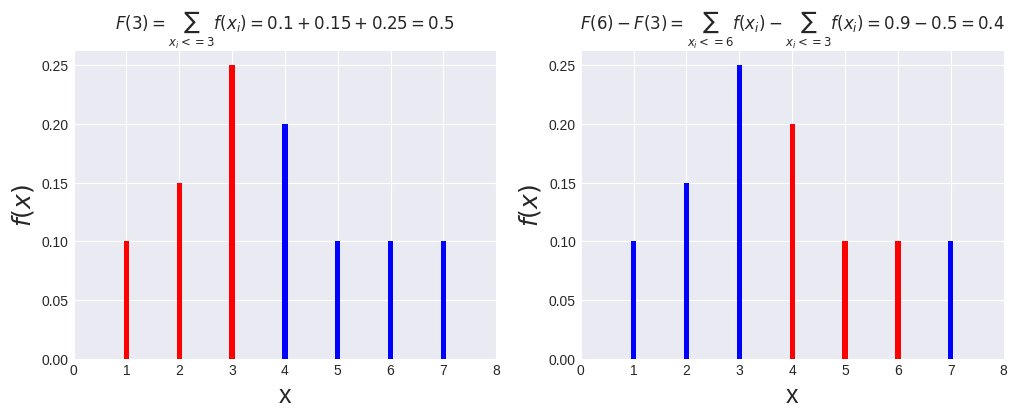

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100) 
p = [0.1, 0.15, 0.25, 0.2, 0.1, 0.1, 0.1]
x = [1, 2, 3, 4, 5, 6, 7]
xmin = min(x)-1
xmax = max(x)+1

axes[0].bar(x, p, width=0.1, color=["r", "r", "r", "b", "b", "b", "b"])

axes[0].set_xlabel("x", fontsize=18);
axes[0].set_ylabel("$f(x)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].set_title("$F(3)=\sum_{x_i<=3}f(x_i)=0.1+0.15+0.25=0.5$")

axes[1].bar(x, p, width=0.1, color=["b", "b", "b", "r", "r", "r", "b"])
axes[1].set_xlabel("x", fontsize=18);
axes[1].set_ylabel("$f(x)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
axes[1].set_title("$F(6)-F(3)=\sum_{x_i<=6}f(x_i)-\sum_{x_i<=3}f(x_i)=0.9-0.5=0.4$");


F(q)=0.17 Q(F(q))=5.10


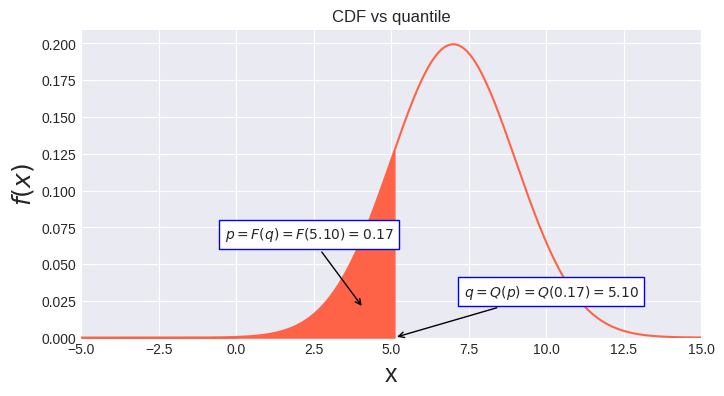

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 
mu = 7
std = 2
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, mu, std)

ax.plot(x, pdf, c="tomato")
ax.set_title("CDF vs quantile")
ax.set_xlabel("x", fontsize=18);
ax.set_ylabel("$f(x)$", fontsize=18);
ax.set_ylim(0)
ax.set_xlim(xmin, xmax)

q = 5.1

x0 = np.linspace(xmin, q, num=100)
p0 = stats.norm.pdf(x0, mu, std)
ax.fill_between(x0, p0, 0, color="tomato")

cdf = stats.norm.cdf(q, mu, std)
q_from_cdf = stats.norm.ppf(cdf, mu, std)
print("F(q)=%.2f"%cdf, "Q(F(q))=%.2f"%q_from_cdf)
ax.annotate("$p=F(q)=F(%.2f)=%.2f$"%(q_from_cdf, cdf), (q_from_cdf-1, 0.02), 
                 xytext=(-100, 50), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"))

ax.annotate("$q=Q(p)=Q(%.2f)=%.2f$"%(cdf, q_from_cdf), (q, 0), 
                 xytext=(50, 30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));

## Some probability distributions

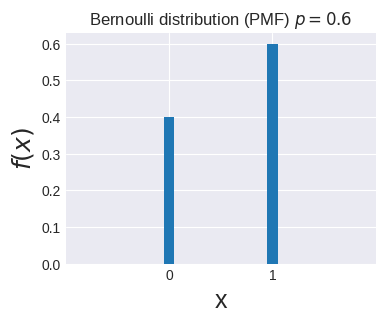

In [11]:
# Bernoulli
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 

ax.bar([0,1],[0.4,
              0.6],
        width=0.1); 
ax.set_xlim(-1,2)
ax.set_xticks([0,1]);
ax.set_title("Bernoulli distribution (PMF) $p=0.6$")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("x", fontsize=18);



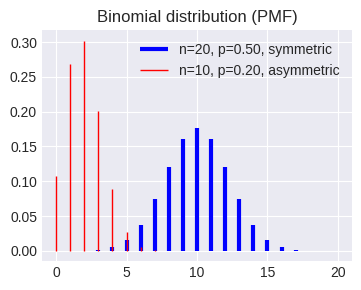

In [12]:
# Binomial
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 

ns = [20, 10]
ps = [0.5, 0.2]
colors = ["b", "r", "g", "c"]
linestyles = ["-", "-"]
labels = ["symmetric", "asymmetric"]
lws = [3, 1]
for i, pn in enumerate(zip(ps, ns)):
    p, n = pn
    x = list(range(0,n+1))
    rv = stats.binom(n, p)
    ax.vlines(x, 0, rv.pmf(x), lw=lws[i], color=colors[i], linestyle=linestyles[i], label="n=%i, p=%.2f, %s"%(n, p, labels[i]))
ax.set_title("Binomial distribution (PMF)")
ax.legend(loc='best', frameon=False);

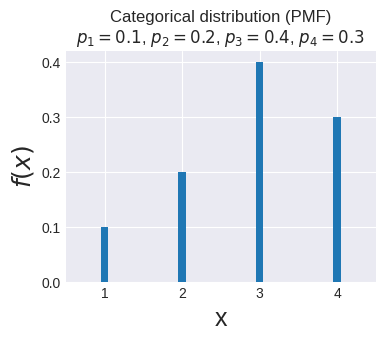

In [13]:
# Categorical
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 

N = 10000
ax.bar(list(range(1,5)),[0.1, 0.2, 0.4, 0.3],
           width=0.1); 
ax.set_xlim(0.5,4.5)
ax.set_xticks([1,2,3,4]);
ax.set_title("Categorical distribution (PMF)\n$p_1=0.1$, $p_2=0.2$, $p_3=0.4$, $p_4=0.3$")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("x", fontsize=18);

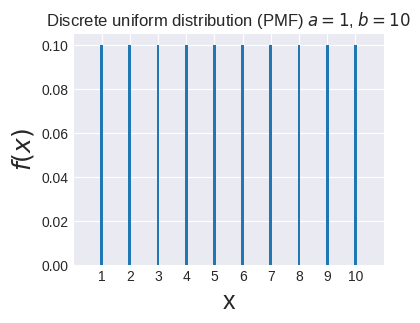

In [14]:
# Discrete uniform
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 


# uniform = stats.randint.rvs(size=N, low=1, high=10)
ax.bar(list(range(1,11)),[0.1 for i in range(1, 11)],
           width=0.1); 
ax.set_xlim(0,11)
ax.set_xticks([i for i in range(1, 11)]);
ax.set_title("Discrete uniform distribution (PMF) $a=1$, $b=10$")
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_xlabel("x", fontsize=18);

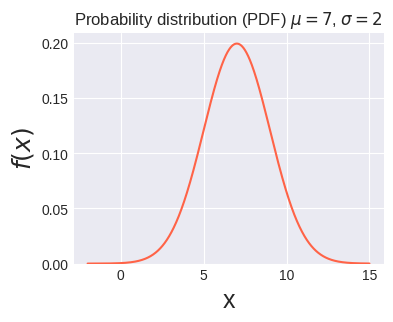

In [15]:
# Gaussian distribution
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=100) 
mu = 7
std = 2
x = np.linspace(-2, 15, num=1000)
pdf = stats.norm.pdf(x, mu, std)
ax.plot(x, pdf, c="tomato")
ax.set_title("Probability distribution (PDF) $\mu=%i$, $\sigma=%i$"%(mu, std))
ax.set_xlabel("x", fontsize=18);
ax.set_ylabel("$f(x)$", fontsize=18);
ax.set_ylim(0);

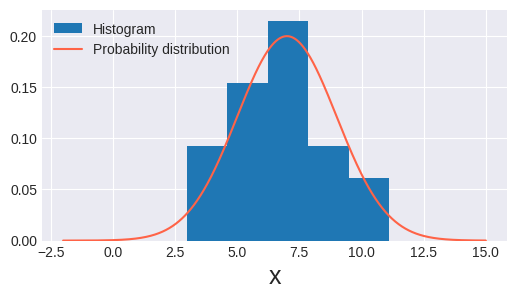

In [16]:
# Gaussian distribution
fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi=100) 
mu = 7
std = 2
x = np.linspace(-2, 15, num=1000)
pdf = stats.norm.pdf(x, mu, std)
ax.hist(x20, density=True, bins=5, label="Histogram") 
ax.plot(x, pdf, c="tomato", label="Probability distribution")
ax.set_xlabel("x", fontsize=18)
ax.legend(loc="upper left")
ax.set_ylim(0);


## Histogram vs theoretical distributions

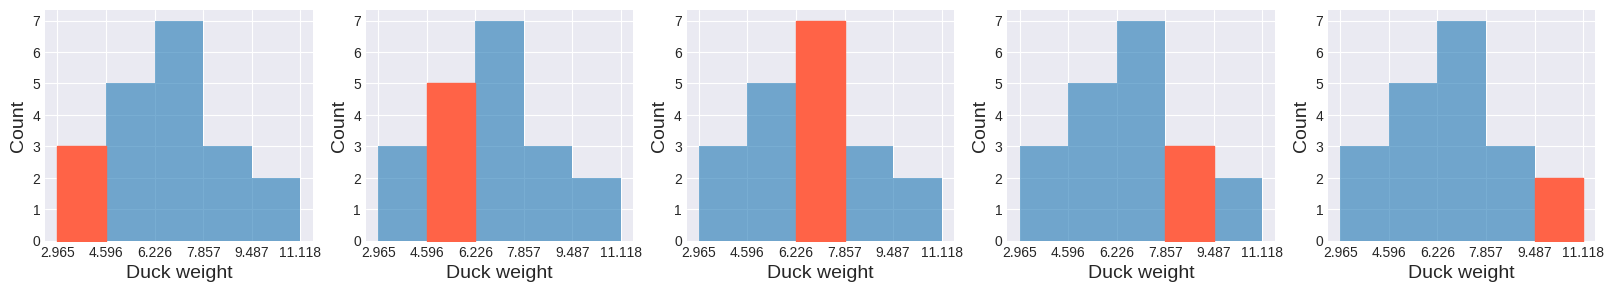

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(20,3), dpi=100) 
for i in range(5):
    cs, bins, _ = axes[i].hist(x20, bins=5, zorder=1, alpha=0.6)
    axes[i].set_xticks(bins)
    axes[i].set_xlabel("Duck weight", fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)
    axes[i].fill_between([bins[i], bins[i+1]], 
                         [cs[i], cs[i]], 0, color="tomato")


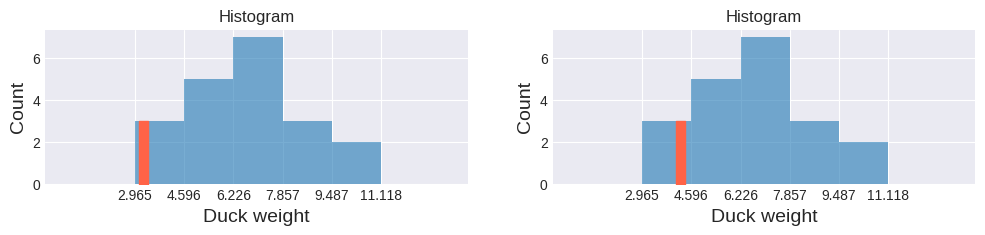

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,2), dpi=100) 
xmin = 0
xmax = 14
cs, bins, _ = axes[0].hist(x20, bins=5, alpha=0.6)
axes[0].set_xticks(bins)
axes[0].set_xlabel("Duck weight", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].set_title("Histogram")
axes[0].fill_between([3.1, 3.4], [3, 3], 0, color="tomato")
axes[0].set_xlim(xmin, xmax)
cs, bins, _ = axes[1].hist(x20, bins=5, alpha=0.6)
axes[1].set_xticks(bins)
axes[1].set_xlabel("Duck weight", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].set_title("Histogram")
axes[1].set_xlim(xmin, xmax)
axes[1].fill_between([4.1, 4.4], [3, 3], 0, color="tomato");


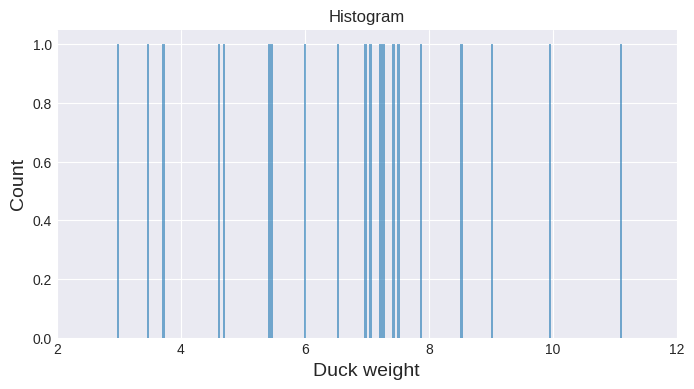

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(8,4), dpi=100) 
xmin = 2
xmax = 12
cs, bins, _ = axes.hist(x20, bins=200, alpha=0.6)
# axes.set_xticks(bins)
axes.set_xlabel("Duck weight", fontsize=14)
axes.set_ylabel("Count", fontsize=14)
axes.set_title("Histogram")
axes.set_xlim(xmin, xmax);


0.010342259591287178
0.02327122497596211


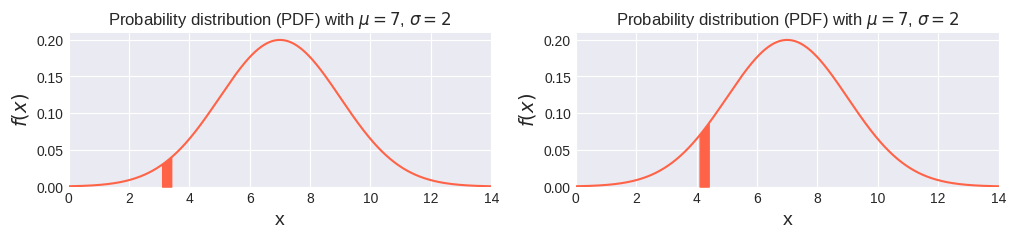

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,2), dpi=100) 
x0 = [3.1, 3.4]
x1 = [4.1, 4.4]
std = 2
mu = 7
xmin = 0
xmax = 14
x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, mu, std)
p0 = [pdf[(x>=x0[0])][0], pdf[(x>=x0[1])][0]]
p1 = [pdf[(x>=x1[0])][0], pdf[(x>=x1[1])][0]]
axes[0].plot(x, pdf, c="tomato")
axes[0].set_title("Probability distribution (PDF) with $\mu=%i$, $\sigma=%i$"%(mu, std))
axes[0].set_xlabel("x", fontsize=14)
axes[0].set_ylabel("$f(x)$", fontsize=14)
axes[0].fill_between(x0, p0, 0, color="tomato")
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[1].plot(x, pdf, c="tomato")
axes[1].set_title("Probability distribution (PDF) with $\mu=%i$, $\sigma=%i$"%(mu, std))
axes[1].set_xlabel("x", fontsize=14);
axes[1].set_ylabel("$f(x)$", fontsize=14);
axes[1].fill_between(x1, p1, 0, color="tomato")
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
print(stats.norm.cdf(3.4, loc=mu, scale=std)-stats.norm.cdf(3.1, loc=mu, scale=std))
print(stats.norm.cdf(4.4, loc=mu, scale=std)-stats.norm.cdf(4.1, loc=mu, scale=std))

# Location-scale family

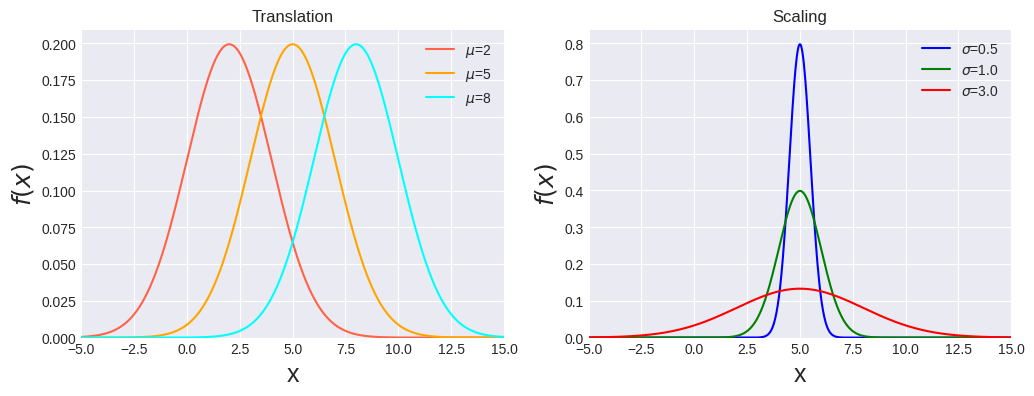

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=100) 
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
x0 = 4
mus = [2, 5, 8] # unknown parameter
sigma = 2 # known
colors = ["tomato", "orange", "cyan"]

for i, mu in enumerate(mus):
    pdf = stats.norm.pdf(x, mu, sigma)
    axes[0].plot(x, pdf, c=colors[i], label="$\mu$=%i"%mu)
    _p = pdf[x>=x0][0]
    _x = x[x>=x0][0]

axes[0].set_title("Translation")
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("$f(x)$", fontsize=18)
axes[0].legend()
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)

sigmas = [0.5, 1, 3]
mu = 5
colors = ["blue", "green", "red"]
for i, sigma in enumerate(sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    axes[1].plot(x, pdf, c=colors[i], label="$\sigma$=%.1f"%sigma)
    _p = pdf[x>=x0][0]
    _x = x[x>=x0][0]

axes[1].set_title("Scaling")
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("$f(x)$", fontsize=18)
axes[1].legend()
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax);

# Modeling

# Q-Q plot

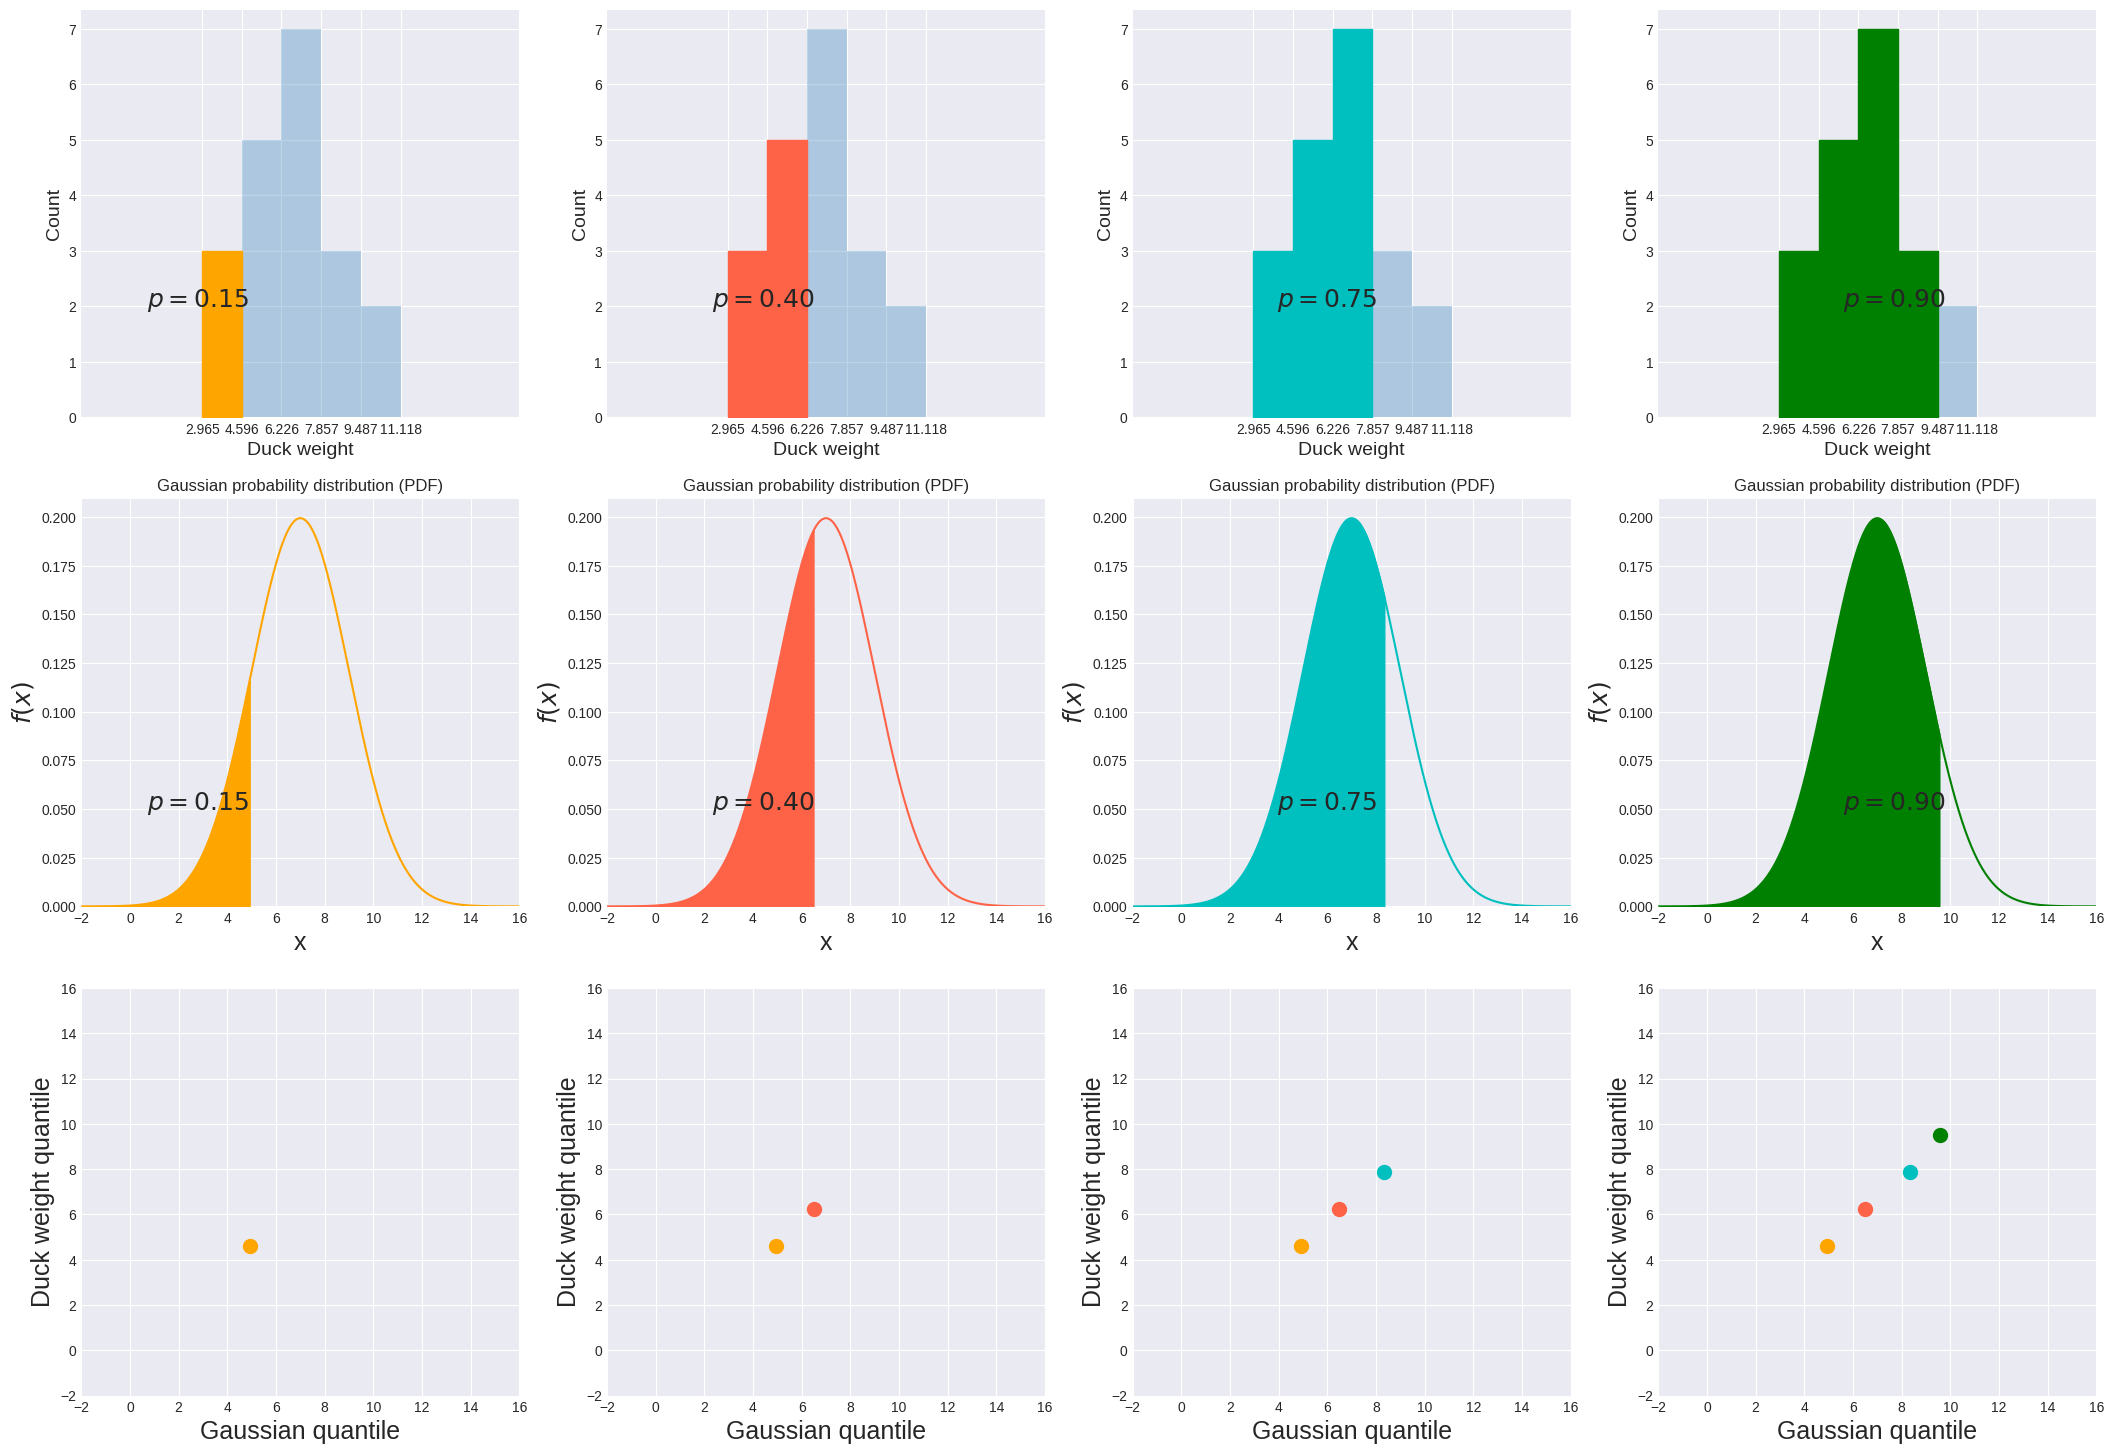

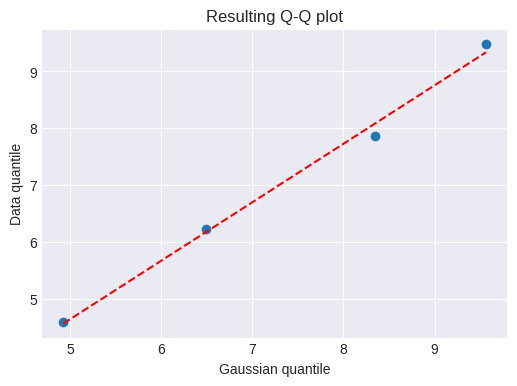

In [22]:

fig, axes = plt.subplots(3, 4, figsize=(26,18), dpi=100) 
xmin = -2
xmax = 16
x = np.linspace(xmin, xmax, num=1000)
mu = 7
std = 2
pdf = stats.norm.pdf(x, mu, std)
qq = np.zeros((4, 3))
colors = ["orange", "tomato", "c", "g"]
for i in range(4):
    cs, bins, _ = axes[0,i].hist(x20, bins=5, zorder=1, alpha=0.3)
    p = cs[:i+1].sum()/cs.sum()
    
    axes[0,i].set_xticks(bins)
    axes[0,i].set_xlabel("Duck weight", fontsize=14)
    axes[0,i].set_ylabel("Count", fontsize=14)
    for k in range(i+1):
        axes[0,i].fill_between([bins[k], bins[k+1]], 
                             [cs[k], cs[k]], 
                             0, color=colors[i])
    axes[0,i].annotate("$p=%.2f$"%p, (bins[i], 2), 
                       xytext=(-40, 0), 
                       textcoords="offset points", 
                       fontsize=18)  
    axes[0,i].set_xlim(xmin, xmax)
    axes[1,i].plot(x, pdf, c=colors[i])
    axes[1,i].set_title("Gaussian probability distribution (PDF)")
    axes[1,i].set_xlabel("x", fontsize=18)
    axes[1,i].set_ylabel("$f(x)$", fontsize=18)
    
    _q = stats.norm.ppf(p, loc=mu, scale=std)
    qq[i, 0] = p
    qq[i, 1] = _q
    qq[i, 2] = bins[i+1]
    p_q = pdf[(x>=-2)&(x<=_q)]
    x_q = x[(x>=-2)&(x<=_q)]
    axes[1,i].fill_between(x_q, 
                           p_q, 0, color=colors[i])
    axes[1,i].set_ylim(0)
    axes[1,i].set_xlim(xmin, xmax)
    axes[1,i].annotate("$p=%.2f$"%p, (bins[i], 0.05), 
                       xytext=(-40, 0), 
                       textcoords="offset points", 
                       fontsize=18)    
    for _i in range(i+1):
        axes[2,i].scatter(qq[_i, 1], qq[_i, 2], marker="o", s=100, c=colors[_i])
    axes[2,i].set_ylim(xmin, xmax)
    axes[2,i].set_xlim(xmin, xmax) 
    axes[2,i].set_xlabel("Gaussian quantile", fontsize=18)
    axes[2,i].set_ylabel("Duck weight quantile", fontsize=18)    
    
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=100)
ax.scatter(qq[:, 1], qq[:, 2])
poly = np.polyfit(x=qq[:, 1], y=qq[:, 2], deg=1)
ax.plot(qq[:, 1], poly[1] + poly[0]*qq[:, 1], color="red", linestyle="dashed")
ax.set_xlabel("Gaussian quantile")
ax.set_ylabel("Data quantile")
ax.set_title("Resulting Q-Q plot")
plt.show()


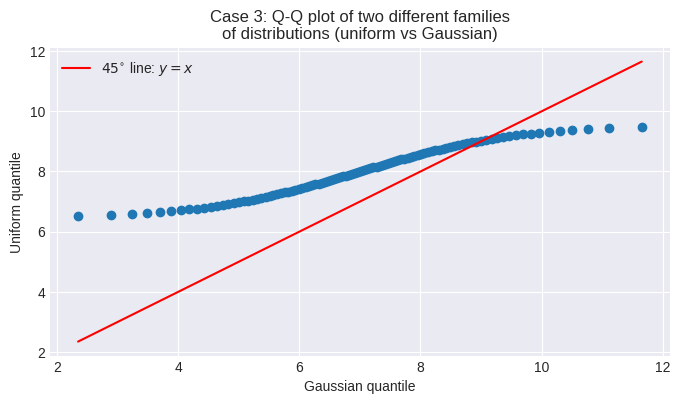

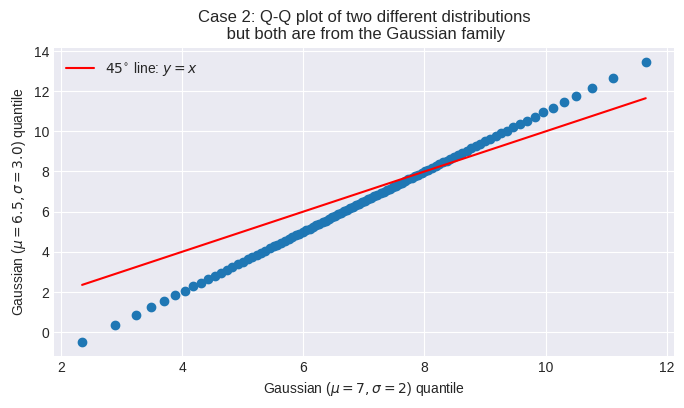

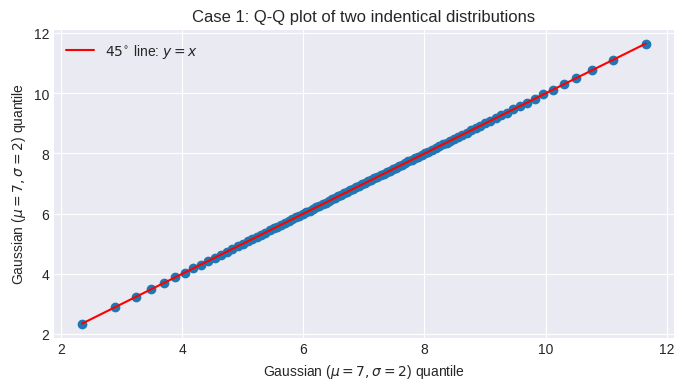

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100)
mu = 7
std = 2
p = np.linspace(1, 99, num=100)*0.01
q1 = stats.norm.ppf(p, loc=mu, scale=std)
q2 = stats.uniform.ppf(p, loc=6.5, scale=3)
ax.scatter(q1, q2)
poly = np.polyfit(x=q1, y=q1, deg=1)
ax.plot(q1, poly[1] + poly[0]*q1, color="red", label="$45^{\circ}$ line: $y=x$")
ax.set_xlabel("Gaussian quantile")
ax.set_ylabel("Uniform quantile")
ax.set_title("Case 3: Q-Q plot of two different families\nof distributions (uniform vs Gaussian)")
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100)
mu2, std2 = 6.5, 3
q1 = stats.norm.ppf(p, loc=mu, scale=std)
q2 = stats.norm.ppf(p, loc=mu2, scale=std2)
ax.scatter(q1, q2)
poly = np.polyfit(x=q1, y=q1, deg=1)
ax.plot(q1, poly[1] + poly[0]*q1, color="red", label="$45^{\circ}$ line: $y=x$")
ax.set_xlabel("Gaussian ($\mu=%i,\sigma=%i$) quantile"%(mu, std))
ax.set_ylabel("Gaussian ($\mu=%.1f,\sigma=%.1f$) quantile"%(mu2, std2))
ax.set_title("Case 2: Q-Q plot of two different distributions\n but both are from the Gaussian family")
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=100)
q1 = stats.norm.ppf(p, loc=mu, scale=std)
q2 = stats.norm.ppf(p, loc=mu, scale=std)
ax.scatter(q1, q2)
poly = np.polyfit(x=q1, y=q1, deg=1)
ax.plot(q1, poly[1] + poly[0]*q1, color="red", label="$45^{\circ}$ line: $y=x$")
ax.set_xlabel("Gaussian ($\mu=%i,\sigma=%i$) quantile"%(mu, std))
ax.set_ylabel("Gaussian ($\mu=%i,\sigma=%i$) quantile"%(mu, std))
ax.set_title("Case 1: Q-Q plot of two indentical distributions")
ax.legend()
plt.show()

## Functions and variables

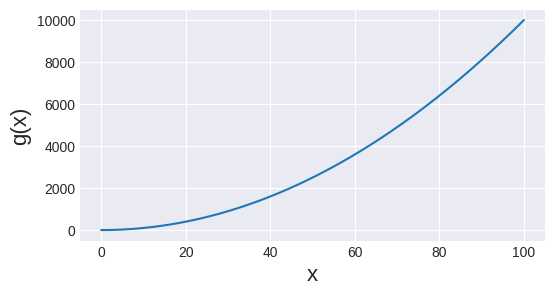

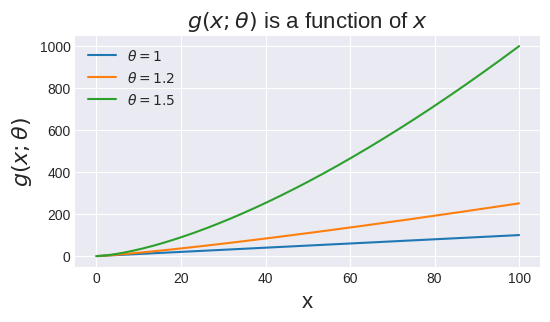

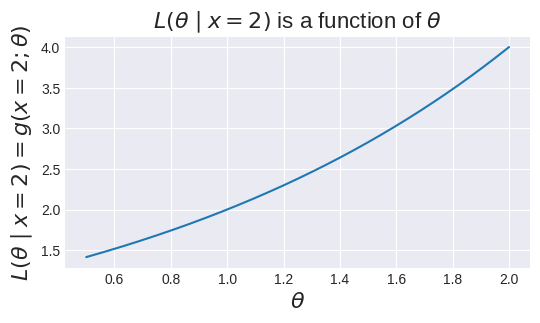

In [24]:
# Assume x can take any value between 0 and 100
xmin = 0
xmax = 100
N = 10000 # Ideally, N should be infinity. But sadly, computers are discrete
          # so N has to be finite.
x = np.linspace(xmin, xmax, num=N) # All possible inputs x
# Plot a function
def g(t):
    return np.power(t, 2)
y = g(x)
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=100) 
ax.plot(x, y)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel(r"g(x)", fontsize=16)

fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=100) 
def g_theta(t, theta):
    return np.power(t, theta)
y = g_theta(x, 1)
ax.plot(x, y, label=r"$\theta=1$")
y = g_theta(x, 1.2)
ax.plot(x, y, label=r"$\theta=1.2$")
y = g_theta(x, 1.5)
ax.plot(x, y, label=r"$\theta=1.5$")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel(r"$g(x;\theta)$", fontsize=16)
ax.set_title(r"$g(x;\theta)$ is a function of $x$", fontsize=16)
ax.legend();

fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=100) 
theta_min, theta_max = 0.5, 2
thetas = np.linspace(theta_min, theta_max, num=N)
def L(t): # define a new function L
    return g_theta(2, t)
L_return_value = L(thetas)

ax.plot(thetas, L_return_value)
ax.set_xlabel(r"$\theta$", fontsize=16)
ax.set_title(r"$L(\theta \mid x=2)$ is a function of $\theta$", fontsize=16)
ax.set_ylabel(r"$L(\theta \mid x=2)=g(x=2; \theta)$", fontsize=16);

# Parameter estimation

## Maximum likelihood

### Probability density function

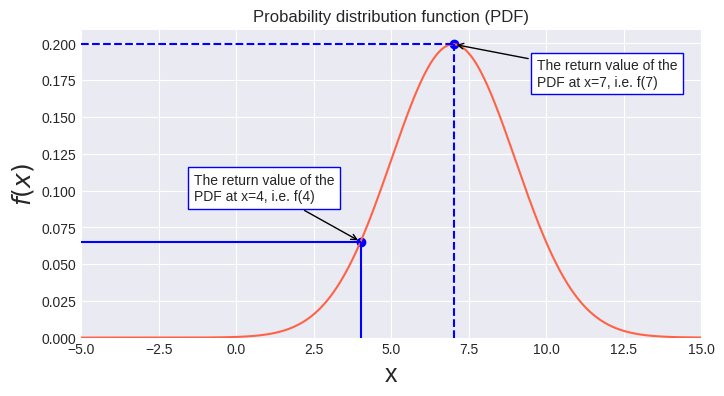

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 
xmin = -5
xmax = 15
mu = 7
std = 2

x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, mu, std)
ax.plot(x, pdf, c="tomato")
ax.set_title("Probability distribution function (PDF)")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0)
ax.set_xlim(xmin, xmax)
x0 = 4
_p = pdf[x>=x0][0]
_x = x[x>=x0][0]
ax.hlines(_p, xmin=xmin, xmax=_x, color="blue")
ax.vlines(_x, ymin=0, ymax=_p, color="blue")
ax.scatter(_x, _p, color="blue")
ax.annotate("The return value of the\nPDF at x=%i, i.e. f(%i)"%(x0, x0), (_x, _p), 
                 xytext=(-120, 30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));
x1 = 7
_p = pdf[x>=x1][0]
_x = x[x>=x1][0]
ax.hlines(_p, xmin=xmin, xmax=_x, color="blue", linestyle="dashed")
ax.vlines(_x, ymin=0, ymax=_p, color="blue", linestyle="dashed")
ax.scatter(_x, _p, color="blue")
ax.annotate("The return value of the\nPDF at x=%i, i.e. f(%i)"%(x1, x1), (_x, _p), 
                 xytext=(60, -30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));

### Probability of an event 

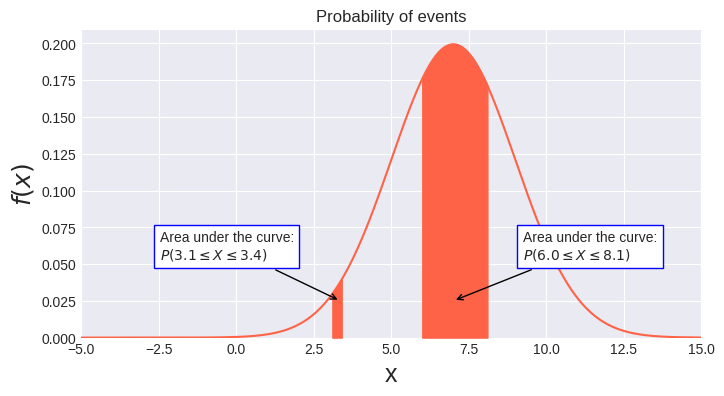

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 

xmin = -5
xmax = 15
mu = 7
std = 2
x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, mu, std)

ax.plot(x, pdf, c="tomato")
ax.set_title("Probability of events")
ax.set_xlabel("x", fontsize=18);
ax.set_ylabel("$f(x)$", fontsize=18);
ax.set_ylim(0)
ax.set_xlim(xmin, xmax)

_x0a = 3.1
_x0b = 3.4
x0 = np.linspace(_x0a, _x0b, num=100)
p0 = stats.norm.pdf(x0, mu, std)
ax.fill_between(x0, p0, 0, color="tomato")
ax.annotate("Area under the curve:\n$P(%.1f\leq X\leq %.1f)$"%(_x0a, _x0b), (_x0a+0.25, 0.025), 
                 xytext=(-130, 30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"))

_x1a = 6
_x1b = 8.1
x1 = np.linspace(_x1a, _x1b, num=100)
p1 = stats.norm.pdf(x1, mu, std)
ax.fill_between(x1, p1, 0, color="tomato")
ax.annotate("Area under the curve:\n$P(%.1f\leq X\leq %.1f)$"%(_x1a, _x1b), (_x1a+1, 0.025), 
                 xytext=(50, 30), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->"},
                 bbox=dict(edgecolor="b", facecolor="white"));

### LIkelihood: which curve has the largest likelihood given x=4?

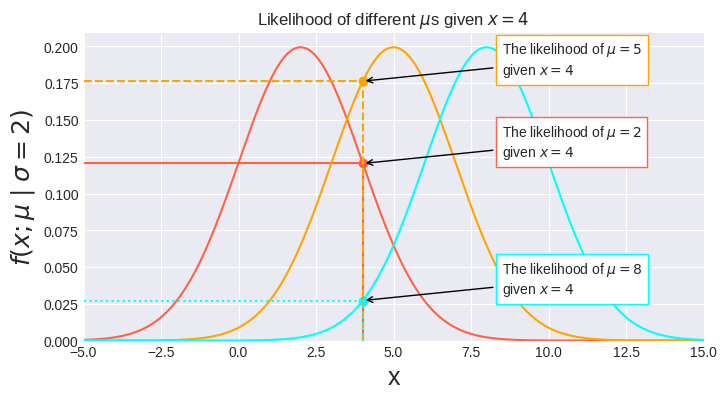

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
x0 = 4
mus = [2, 5, 8] # unknown parameter
sigma = 2 # known
colors = ["tomato", "orange", "cyan"]
linestyles = ["solid", "dashed", "dotted"]

for i, mu in enumerate(mus):
    pdf = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, pdf, c=colors[i])
    _p = pdf[x>=x0][0]
    _x = x[x>=x0][0]
    ax.hlines(_p, xmin=xmin, xmax=_x, color=colors[i], linestyle=linestyles[i])
    ax.vlines(_x, ymin=0, ymax=_p, color=colors[i], linestyle=linestyles[i])
    ax.scatter(_x, _p, color=colors[i])
    ax.annotate("The likelihood of $\mu=%i$\ngiven $x=4$"%mu, (_x, _p), 
                     xytext=(100, 5), 
                     textcoords="offset points", 
                     arrowprops={"arrowstyle":"->"},
                     bbox=dict(edgecolor=colors[i], facecolor="white"));
ax.set_title("Likelihood of different $\mu$s given $x=4$")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("$f(x; \mu \mid \sigma=2)$", fontsize=18)
ax.set_ylim(0)
ax.set_xlim(xmin, xmax);

### Likelihood function given x=4

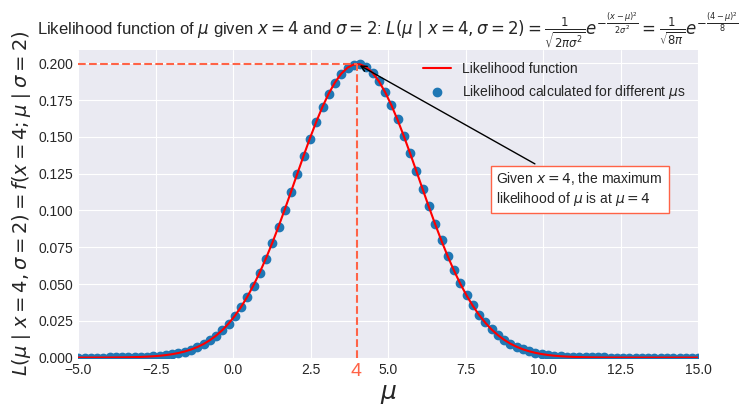

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
x0 = 4
mus = np.linspace(xmin, xmax, num=100) # unknown parameter
sigma = 2 # known

likelihood = []
def likelihood_function(mu):
    return 1/math.sqrt(math.pi*8)*np.exp(-np.power(4-mu, 2)/8)
ax.plot(mus, likelihood_function(mus), color="r", label="Likelihood function")
for i, mu in enumerate(mus):
    pdf = stats.norm.pdf(x, mu, sigma)
    _p = pdf[x>=x0][0]
    likelihood.append(_p)
    
likelihood = np.asarray(likelihood)    
ax.scatter(mus, likelihood, label="Likelihood calculated for different $\mu$s")
ax.set_title("Likelihood function of $\mu$ given $x=4$ and $\sigma=2$: "\
             + r"$L(\mu\mid x=4,\sigma=2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}=\frac{1}{\sqrt{8\pi}}e^{-\frac{(4-\mu)^2}{8}}$")
ax.set_xlabel("$\mu$", fontsize=18)
ax.set_ylabel("$L(\mu\mid x=4,\sigma=2)=f(x=4; \mu \mid \sigma=2)$", fontsize=14)
ax.legend()
ax.set_ylim(0)
ax.set_xlim(xmin, xmax);

ax.hlines(pdf.max(), xmin=xmin, xmax=x0, color="tomato", linestyle="dashed")
ax.vlines(x0, ymin=0, ymax=pdf.max(), color="tomato", linestyle="dashed")

ax.annotate("4", (x0, 0), 
            xytext=(-5, -13), 
            textcoords="offset points", 
            color="tomato", fontsize=14)

ax.annotate("Given $x=%i$, the maximum \nlikelihood of $\mu$ is at $\mu=%i$"%(x0, x0), (x0, pdf.max()), 
            xytext=(100, -100), 
            textcoords="offset points", 
            arrowprops={"arrowstyle":"->"},
            bbox=dict(edgecolor="tomato", facecolor="white"));

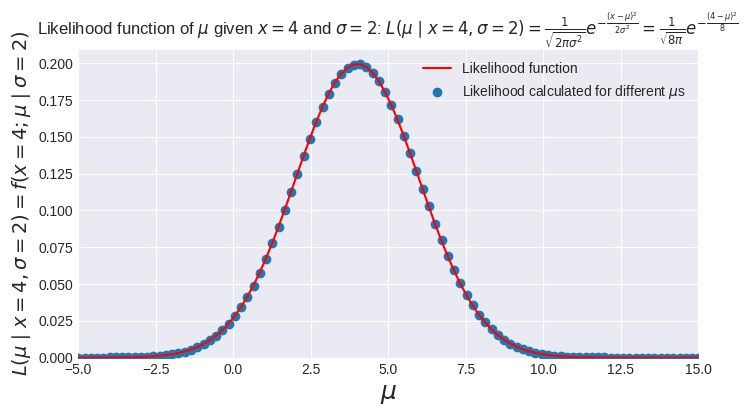

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100) 
xmin = -5
xmax = 15
x = np.linspace(xmin, xmax, num=1000)
x0 = 4
mus = np.linspace(xmin, xmax, num=100) # unknown parameter
sigma = 2 # Known 

likelihood = []
def likelihood_function(mu):
    return 1/math.sqrt(math.pi*8)*np.exp(-np.power(4-mu, 2)/8)
ax.plot(mus, likelihood_function(mus), color="r", label="Likelihood function")
for i, mu in enumerate(mus):
    pdf = stats.norm.pdf(x, mu, sigma)
    _p = pdf[x>=x0][0]
    likelihood.append(_p)
    
likelihood = np.asarray(likelihood)    
ax.scatter(mus, likelihood, label="Likelihood calculated for different $\mu$s")
ax.set_title("Likelihood function of $\mu$ given $x=4$ and $\sigma=2$: "\
             + r"$L(\mu\mid x=4,\sigma=2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}=\frac{1}{\sqrt{8\pi}}e^{-\frac{(4-\mu)^2}{8}}$")
ax.set_xlabel("$\mu$", fontsize=18)
ax.set_ylabel("$L(\mu\mid x=4,\sigma=2)=f(x=4; \mu \mid \sigma=2)$", fontsize=14)
ax.legend()
ax.set_ylim(0)
ax.set_xlim(xmin, xmax);

### Maximum likelihood

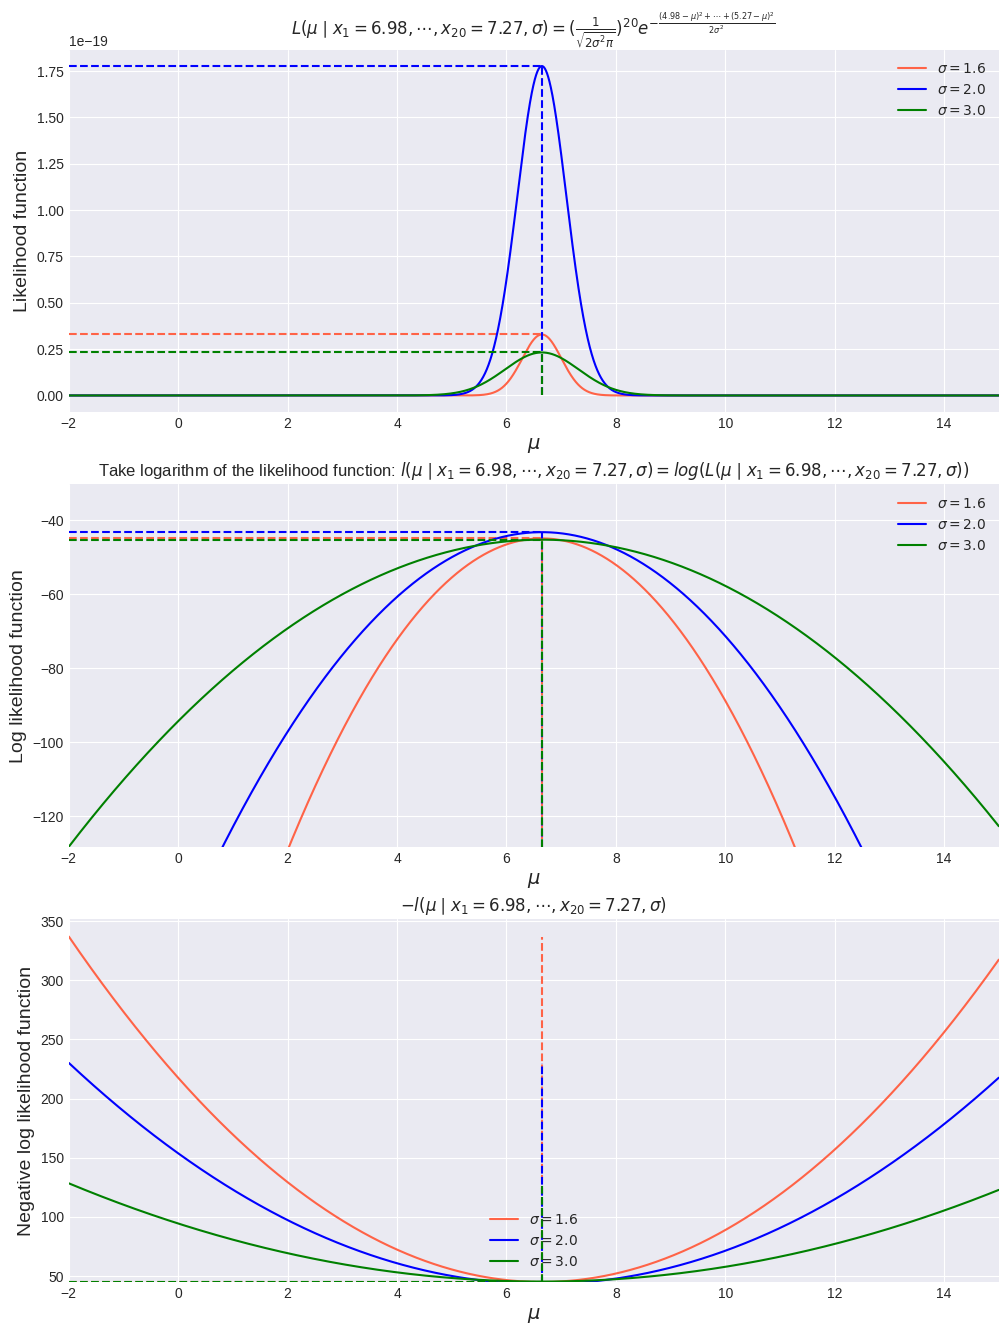

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(12, 16), dpi=100) 
xmin = -2
xmax = 15
n = x20.size
mus = np.linspace(xmin, xmax, num=10000) # parameter
sigmas = [1.6, 2, 3]
colors = ["tomato", "blue", "green"]
for i, sigma in enumerate(sigmas):
    const = math.pow(1/(math.sqrt(2*sigma**2*math.pi)),n)
    L = np.vectorize(lambda mu: np.exp(-(np.sum(np.power(np.subtract(x20, mu),2)))/(2*sigma**2)))(mus)*const
    axes[0].plot(mus, L, color=colors[i], label="$\sigma=%.1f$"%sigma)
    axes[0].set_ylabel("Likelihood function", fontsize=14)
    axes[0].set_xlabel("$\mu$", fontsize=14)
    axes[0].set_title(r"$L(\mu\mid x_1=%.2f, \cdots, x_{20}=%.2f,\sigma)=(\frac{1}{\sqrt{2\sigma^2\pi}})^{20}e^{-\frac{(4.98-\mu)^2+\cdots+(5.27-\mu)^2}{2\sigma^2}}$"%(x20[0], x20[-1]))
    axes[0].set_xlim(xmin, xmax)
    # axes[0].set_ylim(0)

    mu_mle = mus[np.argmax(L)]
    axes[0].hlines(L.max(), xmin=xmin, xmax=mu_mle, color=colors[i], linestyle="dashed")
    axes[0].vlines(mu_mle, ymin=0, ymax=L.max(), color=colors[i], linestyle="dashed")
    axes[0].legend()
    
    logL = np.log(L)
    axes[1].plot(mus, logL, color=colors[i], label="$\sigma=%.1f$"%sigma)
    axes[1].set_ylabel("Log likelihood function", fontsize=14)
    axes[1].set_xlabel("$\mu$", fontsize=14)
    axes[1].set_title(r"Take logarithm of the likelihood function: $l(\mu\mid x_1=%.2f, \cdots, x_{20}=%.2f,\sigma)=log(L(\mu\mid x_1=%.2f, \cdots, x_{20}=%.2f,\sigma))$"%(x20[0], x20[-1], x20[0], x20[-1]))
    mu_mle = mus[np.argmax(logL)]
    axes[1].hlines(logL.max(), xmin=xmin, xmax=mu_mle, color=colors[i], linestyle="dashed")
    axes[1].vlines(mu_mle, ymin=logL.min(), ymax=logL.max(), color=colors[i], linestyle="dashed")
    axes[1].set_xlim(xmin, xmax)
    axes[1].set_ylim(logL.min()) 
    axes[1].legend()    
    neglogL = -logL
    axes[2].plot(mus, neglogL, color=colors[i], label="$\sigma=%.1f$"%sigma)

    axes[2].set_ylabel("Negative log likelihood function", fontsize=14)
    axes[2].set_xlabel("$\mu$", fontsize=14)
    axes[2].set_title(r"$-l(\mu\mid x_1=%.2f, \cdots, x_{20}=%.2f,\sigma)$"%(x20[0], x20[-1]))
    mu_mle = mus[np.argmin(neglogL)]
    axes[2].hlines(neglogL.min(), xmin=xmin, xmax=mu_mle, color=colors[i], linestyle="dashed")
    axes[2].vlines(mu_mle, ymin=neglogL.min(), ymax=neglogL.max(), color=colors[i], linestyle="dashed")
    axes[2].set_xlim(xmin, xmax)
    axes[2].set_ylim(neglogL.min()) 
    axes[2].legend()


(12.217286046860846, 67.14845454755896)

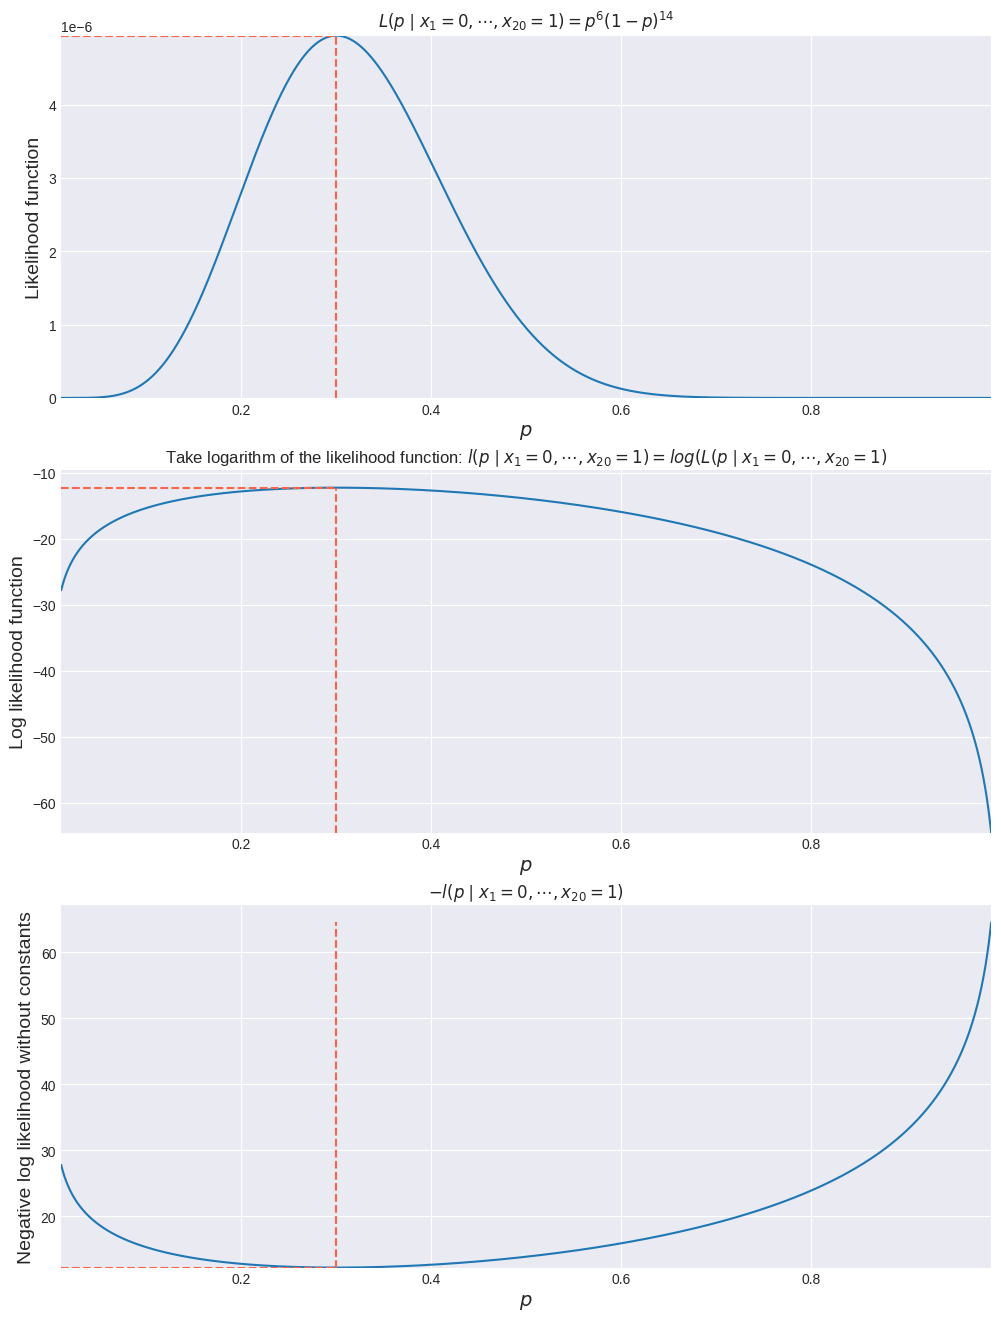

In [31]:
xmin = 0.01
xmax = 0.99
colors = np.asarray([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])
pmf = lambda k: p*k+(1-p)*(1-k)
likelihood = lambda p: math.pow(p, (colors==1).sum())*math.pow((1-p), (colors==0).sum())
ps = np.linspace(xmin, xmax, num=10000) # parameter
L = np.vectorize(likelihood)(ps)

fig, axes = plt.subplots(3, 1, figsize=(12, 16), dpi=100) 
axes[0].plot(ps, L)
axes[0].set_ylabel("Likelihood function", fontsize=14)
axes[0].set_xlabel("$p$", fontsize=14)
axes[0].set_title(r"$L(p\mid x_1=0, \cdots, x_{20}=1)=p^{%i}(1-p)^{%i}$"%((colors==1).sum(), (colors==0).sum()))
axes[0].set_xlim(xmin, xmax)
axes[0].set_ylim(L.min(), L.max())

p_mle = ps[np.argmax(L)]
axes[0].hlines(L.max(), xmin=xmin, xmax=p_mle, color="tomato", linestyle="dashed")
axes[0].vlines(p_mle, ymin=0, ymax=L.max(), color="tomato", linestyle="dashed")

logL = np.log(L)
axes[1].plot(ps, logL)
axes[1].set_ylabel("Log likelihood function", fontsize=14)
axes[1].set_xlabel("$p$", fontsize=14)
axes[1].set_title("Take logarithm of the likelihood function: $l(p\mid x_1=0, \cdots, x_{20}=1)=log(L(p\mid x_1=0, \cdots, x_{20}=1)$")
p_mle = ps[np.argmax(logL)]
axes[1].hlines(logL.max(), xmin=xmin, xmax=p_mle, color="tomato", linestyle="dashed")
axes[1].vlines(p_mle, ymin=logL.min(), ymax=logL.max(), color="tomato", linestyle="dashed")
axes[1].set_xlim(xmin, xmax)
axes[1].set_ylim(logL.min()) 

neglogL = -logL
axes[2].plot(ps, neglogL)

axes[2].set_ylabel("Negative log likelihood without constants", fontsize=14)
axes[2].set_xlabel("$p$", fontsize=14)
axes[2].set_title(r"$-l(p\mid x_1=0, \cdots, x_{20}=1)$")
p_mle = ps[np.argmin(neglogL)]
axes[2].hlines(neglogL.min(), xmin=xmin, xmax=p_mle, color="tomato", linestyle="dashed")
axes[2].vlines(p_mle, ymin=neglogL.min(), ymax=neglogL.max(), color="tomato", linestyle="dashed")
axes[2].set_xlim(xmin, xmax)
axes[2].set_ylim(neglogL.min()) 


## MAP

7.090709070907096 7.090709070907096
7.070707070707073 7.090709070907096
7.090709070907096 7.090709070907096


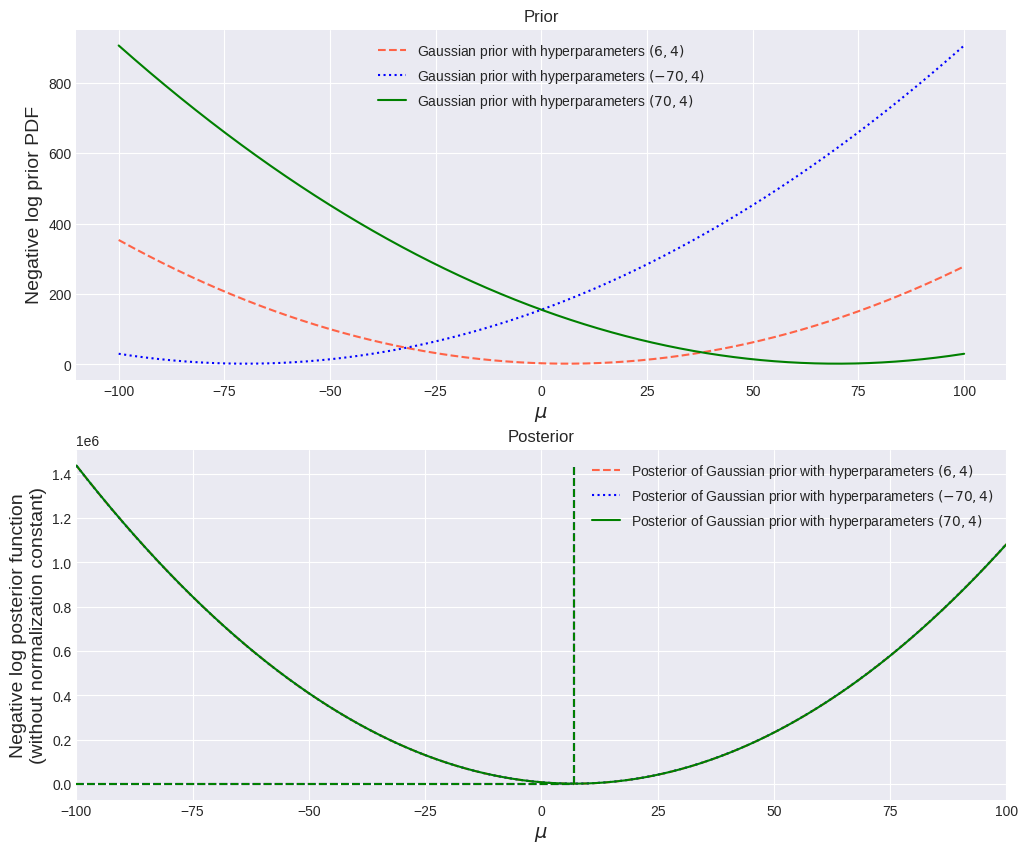

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=100) 
xmin = -100
xmax = 100
std = 2 # known
N = 1000
mu = 7
x = stats.norm.rvs(loc=mu, scale=std, size=N)
mus = np.linspace(xmin, xmax, num=10000) # parameter
sigmas = 2
colors = ["tomato", "blue", "green"]
linestyles = ["dashed", "dotted", "solid"]
# Prior
# Hyperparameters:
hyperparameters = [(6, 4), (-70, 4), (70, 4)]

negloglikelihood = -np.vectorize(lambda mu: stats.norm.logpdf(x=x, loc=mu, scale=std).sum())(mus)
mu_mle = mus[np.argmin(negloglikelihood)]

for i, hyperparameter in enumerate(hyperparameters):
    logprior = stats.norm.logpdf(x=mus, loc=hyperparameter[0], scale=hyperparameter[1])
    neglogprior = -logprior
    axes[0].plot(mus, neglogprior, 
                 color=colors[i], linestyle = linestyles[i], 
                 label="Gaussian prior with hyperparameters $(%i,%i)$"%(hyperparameter[0], 
                                                                        hyperparameter[1]))

    neglogposterior = neglogprior + negloglikelihood
    mu_map = mus[np.argmin(neglogposterior)]
    axes[1].hlines(neglogposterior.min(), xmin=xmin, xmax=mu_map, color=colors[i], linestyle="dashed")
    axes[1].vlines(mu_map, 
                   ymin=neglogposterior.min(), 
                   ymax=neglogposterior.max(), color=colors[i], linestyle="dashed")
    axes[1].plot(mus, neglogposterior, color=colors[i], linestyle = linestyles[i],
                 label="Posterior of Gaussian prior with hyperparameters $(%i,%i)$"%(hyperparameter[0], 
                                                                                     hyperparameter[1]))
    print(mu_map, mu_mle)
    

axes[0].set_ylabel("Negative log prior PDF", fontsize=14)
axes[0].set_xlabel("$\mu$", fontsize=14)
axes[0].set_title("Prior")
axes[0].legend()

axes[1].set_ylabel("Negative log posterior function\n(without normalization constant)", fontsize=14)
axes[1].set_xlabel("$\mu$", fontsize=14)
axes[1].set_title("Posterior")
axes[1].set_xlim(xmin, xmax)
axes[1].legend()

### Different priors result in similar posterior 

0.4781978197819782 0.4792379237923793 0.6208955223880597 [-1505.16241176 -1504.72390353 -1504.28579948 ... -1629.42629216
 -1629.91501384 -1630.40417568]
0.4804380438043805 0.4792379237923793 0.6238805970149254 [-1511.75404851 -1511.3128744  -1510.87210638 ... -1622.83998526
 -1623.32604296 -1623.81253893]
0.4792379237923793 0.4792379237923793 0.6227544910179641 [-1506.45576799 -1506.01699305 -1505.57862227 ... -1624.13280806
 -1624.61913249 -1625.10589517]


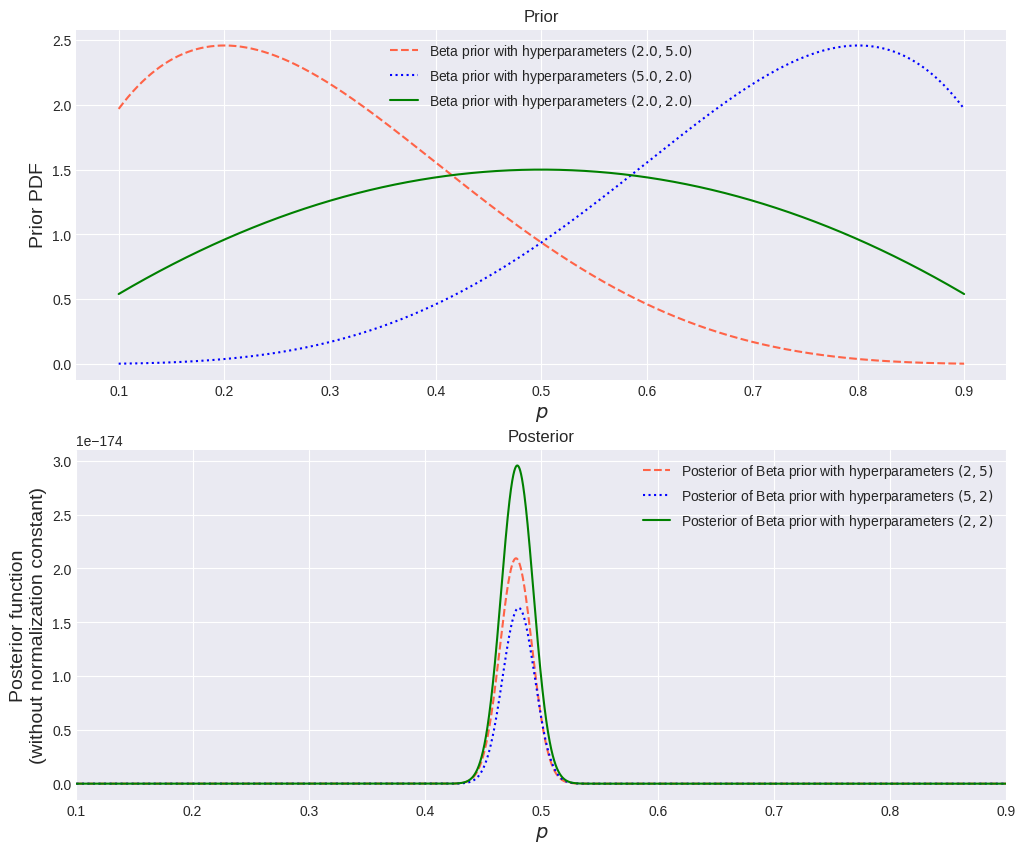

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=100) 
xmin = 0.1
xmax = 0.9

p = 0.46
ps = np.linspace(xmin, xmax, num=10000) # parameter
x = stats.bernoulli.rvs(p=p, size=1300)

n = (x==1).sum()   
 
colors = ["tomato", "blue", "green"]
linestyles = ["dashed", "dotted", "solid"]
# Prior
# Hyperparameters: beta(a,b)
hyperparameters = [(2, 5), (5, 2), (2, 2)]

negloglikelihood = -np.vectorize(lambda p: stats.bernoulli.logpmf(k=x, p=p).sum())(ps)
p_mle = ps[np.argmin(negloglikelihood)]

for i, hyperparameter in enumerate(hyperparameters):
    prior = stats.beta.pdf(x=ps, a=hyperparameter[0], b=hyperparameter[1])
    neglogprior = -np.log(prior+0.0000001)
    axes[0].plot(ps, prior, 
                 color=colors[i], linestyle = linestyles[i], 
                 label="Beta prior with hyperparameters $(%.1f,%.1f)$"%(hyperparameter[0], 
                                                                        hyperparameter[1]))

    neglogposterior = neglogprior + negloglikelihood
    p_map = ps[np.argmin(neglogposterior)]
    
    posterior = np.exp(-neglogposterior+500) # for plotting purposes
    axes[1].plot(ps, posterior, color=colors[i], linestyle = linestyles[i],
                 label="Posterior of Beta prior with hyperparameters $(%i,%i)$"%(hyperparameter[0], 
                                                                                 hyperparameter[1]))
    closed_form = (n+hyperparameter[0]-1)/(N+hyperparameter[0]+hyperparameter[1]-2)
    print(p_map, p_mle, closed_form, -neglogposterior)
    

axes[0].set_ylabel("Prior PDF", fontsize=14)
axes[0].set_xlabel("$p$", fontsize=14)
axes[0].set_title("Prior")
axes[0].legend()

axes[1].set_ylabel("Posterior function\n(without normalization constant)", fontsize=14)
axes[1].set_xlabel("$p$", fontsize=14)
axes[1].set_title("Posterior")
axes[1].set_xlim(xmin, xmax)
axes[1].legend();

### Relation betweeen prior, likelihood and posterior

MLE: 6.6471647164716465 , MAP Gaussian prior (0.0,2.0): 6.331133113311331
MLE: 6.6471647164716465 , MAP Gaussian prior (0.0,6.0): 6.611161116111612
MLE: 6.6471647164716465 , MAP Gaussian prior (10.0,6.0): 6.665166516651665
MLE: 6.6471647164716465 , MAP Uniform prior (-5.0,100.0): 6.6471647164716465


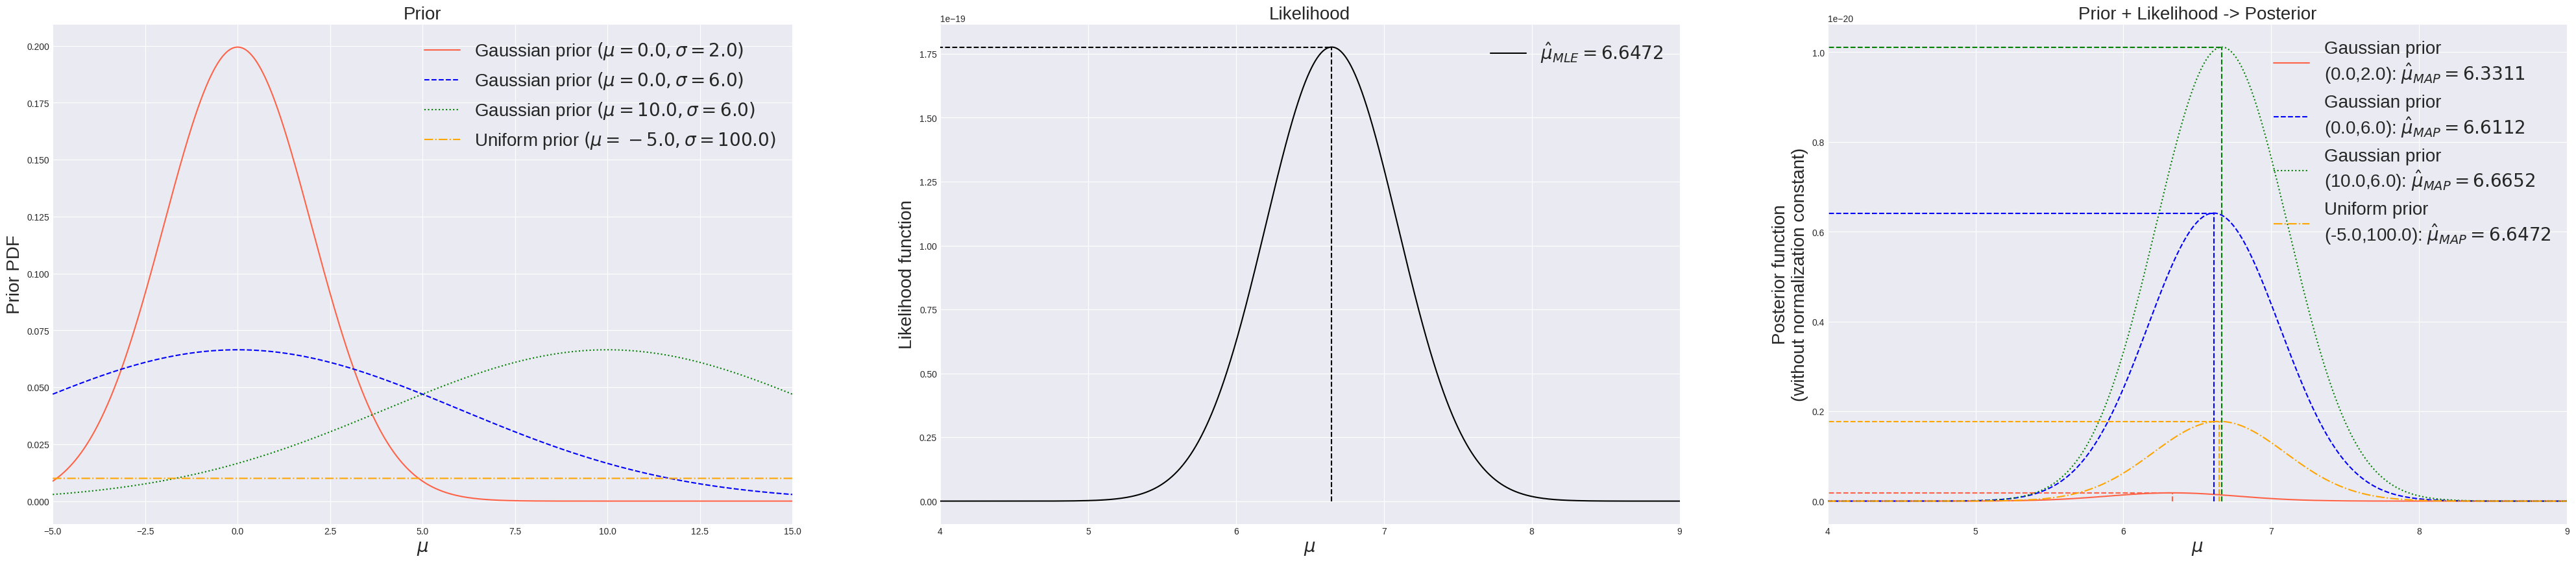

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(50, 10), dpi=100) 
xmin = -5
xmax = 15
std = 2 # known
mu = 7
x = x20
# x = stats.norm.rvs(loc=mu, scale=std, size=30)
mus = np.linspace(xmin, xmax, num=10000) # parameter

colors = ["tomato", "blue", "green", "orange"]
linestyles = ["solid", "dashed", "dotted", "-."]
# Prior
# Hyperparameters:
hyperparameters = [(0, 2), (0, 6), (10, 6), (xmin, 100)]
prirordist = ["Gaussian", "Gaussian", "Gaussian", "Uniform"]
priorrvs = [stats.norm, 
            stats.norm,
            stats.norm,
            stats.uniform]

negloglikelihood = -np.vectorize(lambda mu: stats.norm.logpdf(x=x, loc=mu, scale=std).sum())(mus)
mu_mle = mus[np.argmin(negloglikelihood)]
likelihood = np.exp(-negloglikelihood)
axes[1].plot(mus, likelihood, color="k", label=r"$\hat{\mu}_{MLE}=%.4f$"%mu_mle)
axes[1].hlines(likelihood.max(), xmin=xmin, xmax=mu_mle, color="k", linestyle="dashed")
axes[1].vlines(mu_mle, ymin=0, ymax=likelihood.max(), 
               color="k", linestyle="dashed")
axes[1].set_ylabel("Likelihood function", fontsize=20)
axes[1].set_xlabel("$\mu$", fontsize=20)
axes[1].set_title("Likelihood", fontsize=20)
axes[1].set_xlim(4, 9)
axes[1].legend(fontsize=20)
    
for i, priorrv in enumerate(priorrvs):
    logprior = priorrv.logpdf(x=mus, loc=hyperparameters[i][0], scale=hyperparameters[i][1])
    neglogprior = -logprior
    axes[0].plot(mus, np.exp(logprior), 
                 color=colors[i], 
                 linestyle=linestyles[i],
                 label="%s prior $(\mu=%.1f, \sigma=%.1f)$"%(prirordist[i], 
                                                            hyperparameters[i][0], 
                                                            hyperparameters[i][1]))

    neglogposterior = neglogprior + negloglikelihood
    mu_map = mus[np.argmin(neglogposterior)]
    posterior = np.exp(-neglogposterior)
    axes[2].hlines(posterior.max(), xmin=xmin, xmax=mu_map, 
                   color=colors[i], linestyle="dashed")
    axes[2].vlines(mu_map, 
                   ymin=posterior.min(), 
                   ymax=posterior.max(), color=colors[i], linestyle="dashed")
    axes[2].plot(mus, posterior, color=colors[i], linestyle=linestyles[i],
                 label="%s prior\n(%.1f,%.1f): "%(prirordist[i],
                                                hyperparameters[i][0], 
                                                hyperparameters[i][1]) + r"$\hat{\mu}_{MAP}=%.4f$"%mu_map)
    print("MLE:", mu_mle, ", MAP %s prior (%.1f,%.1f):"%(prirordist[i], hyperparameters[i][0], hyperparameters[i][1]), mu_map)
    

axes[0].set_ylabel("Prior PDF", fontsize=20)
axes[0].set_xlabel("$\mu$", fontsize=20)
axes[0].set_title("Prior", fontsize=20)
axes[0].set_xlim(xmin, xmax)
axes[0].legend(fontsize=20)

axes[2].set_ylabel("Posterior function\n(without normalization constant)", fontsize=20)
axes[2].set_xlabel("$\mu$", fontsize=20)
axes[2].set_title("Prior + Likelihood -> Posterior", fontsize=20)
axes[2].set_xlim(4, 9)
axes[2].legend(loc="upper right", fontsize=20);

